In [116]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
%matplotlib notebook
#%matplotlib widget
import pandas as pd
from matplotlib.lines import Line2D
from scipy.stats import linregress 
from scipy.fft import fft, rfft,fftshift
from scipy.fft import fftfreq, rfftfreq

from scipy.fft import fft, rfft,fftshift
from scipy.fft import fftfreq, rfftfreq
import sys
import utilities
import importlib
importlib.reload(utilities)
import json
import pickle

Reading an lc code:

In [117]:
df=pd.read_csv("classified_lcs\grs1915_lc"+str(181)+".txt",sep="	",skiprows=[0, 1], header=None)
df.columns = ['time', 'total','low','mid','high'] #time in seconds

In [118]:
len(df)

9311

In [119]:
df

time        total         low         mid   high
0     9.098948e+07  1152.000017  521.600008  630.400009  816.0
1     9.098948e+07  1272.000019  632.000009  640.000010  880.0
2     9.098948e+07  1160.000017  540.800008  619.200009  888.0
3     9.098948e+07  1214.400018  568.000008  646.400010  752.0
4     9.098948e+07  1219.200018  604.800009  614.400009  872.0
...            ...          ...         ...         ...    ...
9306  9.099064e+07  1454.400022  769.600011  684.800010  744.0
9307  9.099064e+07  1299.200019  702.400010  596.800009  560.0
9308  9.099064e+07  1468.800022  769.600011  699.200010  752.0
9309  9.099064e+07  1665.600025  851.200013  814.400012  992.0
9310  9.099064e+07  1513.600023  793.600012  720.000011  880.0

[9311 rows x 5 columns]

In [120]:
#loading the shaplet
with open("shaplet.pkl", "rb") as f:
    shaplet = pickle.load(f)

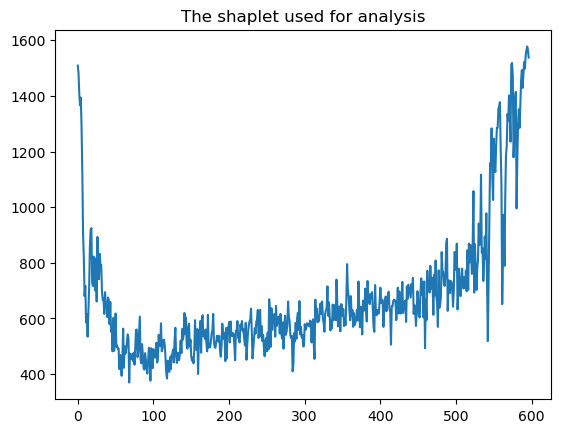

In [121]:
%matplotlib inline
plt.title("The shaplet used for analysis")
plt.plot(shaplet)
plt.show()

Analysis:

In [122]:
len(shaplet)

597

In [123]:
with open("computed_data.pkl", "rb") as f:
    data = pickle.load(f)  # Assuming it's a dictionary

print(data.keys())

dict_keys(['min_distances_table', 'argsort_min', 'argsort_min_without_nan', 'dist_table', 'first_column', 'second_column', 'third_column'])


In [124]:
min_distances_table=np.array(data['min_distances_table'])

In [125]:
argsort_min=np.array(data["argsort_min"])

In [126]:
argsort_min_=np.array(data["argsort_min_without_nan"])

In [127]:
distancestable=data["dist_table"]

In [128]:
summarylcindeces=np.array(data["first_column"]).astype(int)

In [129]:
summarypositions=np.array(data["second_column"]).astype(int)

In [130]:
summaryminimas=np.array(data["third_column"])

In [131]:
summarytable=[]
for i in range(len(data["first_column"])):
    summarytable.append([data["first_column"][i],data["second_column"][i],data["third_column"][i]])

In [132]:
#summary table :      light curve index , minimum position , chi^2      
#it sorted based on the minimas

In [133]:
quality=[0]*len(distancestable) #i ll store the quality of the shaplet matching or not the signal
count=[0]*len(distancestable)

In [134]:
cut=3

In [135]:
n=np.sum(summaryminimas<cut)

for i in range(n):
    lc_index=summarylcindeces[i]
    count[lc_index]+=1

In [389]:
count

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 8,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 12,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 6,
 23,
 40,
 0,
 12,
 0,
 8,
 3,
 1,
 3,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 48,
 133,
 62,
 7,
 24,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [390]:
count[181]

48

In [391]:
l=np.where(summarylcindeces==181)
c=0

In [392]:
np.sum( (summarylcindeces==181)&(summaryminimas<cut))

12

In [136]:
summarypositions[(summarylcindeces==181)&(summaryminimas<cut)]

array([ 294, 2932, 8214, 4372, 1554, 6317, 2337, 5066, 5709,  904, 3781,
       6969])

In [137]:
#normalisation for each lc index:
for i in range(len(count)):
    df=pd.read_csv("classified_lcs\grs1915_lc"+str(i)+".txt",sep="	",skiprows=[0, 1], header=None)
    quality[i]=count[i]*len(shaplet)/len(df)

In [138]:
quality=np.array(quality)

In [139]:
quality[quality!=0]

array([0.02286393, 0.04379562, 0.04534062, 0.02997138, 0.06792582,
       0.03986644, 0.03194734, 0.19434859, 0.40915633, 0.10855532,
       0.15062445, 0.17279305, 0.08801415, 0.07906238, 0.76941252,
       0.75877537, 0.35707076, 0.51134904, 0.32261551, 0.79637923,
       0.08926769, 0.05015332, 0.02253255, 0.1407438 , 0.04289101,
       0.02332122, 0.08760088, 0.02776357, 0.02343842, 0.02367638,
       0.09138221])

(array([19.,  4.,  1.,  1.,  2.,  0.,  1.,  0.,  0.,  3.]),
 array([0.02253255, 0.09991722, 0.17730189, 0.25468656, 0.33207122,
        0.40945589, 0.48684056, 0.56422523, 0.64160989, 0.71899456,
        0.79637923]),
 <BarContainer object of 10 artists>)

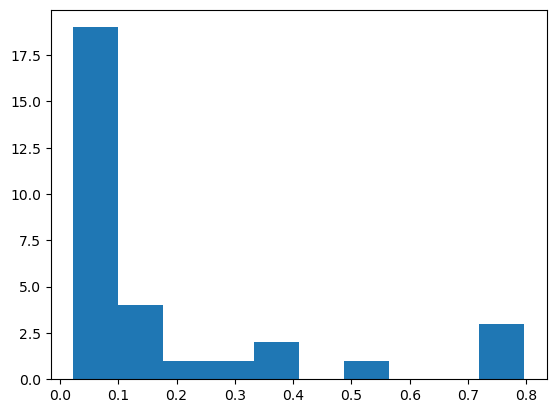

In [140]:
plt.hist(quality[quality!=0])

In [398]:
quality

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.06859178,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.0306862 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17518248, 0.        , 0.02498431, 0.        ,
       0.29164631, 0.        , 0.08481318, 0.10366383, 0.        ,
       0.09329583, 0.04729462, 0.08183687, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.1813625 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [165]:
with open("classes.json", "r") as f:
    lcclasses = json.load(f)

In [166]:
with open("key2class.json", "r") as f:
    key2class = json.load(f)

In [142]:
classes_={}

In [143]:
for i in range(len(count)):
    if(count[i]!=0):
        if (key2class[str(i)] in classes_.keys()):
            classes_[key2class[str(i)]].append(i)
        else:
            classes_[key2class[str(i)]]=[i]

In [144]:
for key in classes_.keys():
    classes_[key]=np.array(classes_[key])

In [145]:
classes_.keys()

dict_keys(['beta', 'delta', 'mu', 'nu', 'rho', 'kappa', 'lambda', 'eta'])

In [146]:
classes_=dict(sorted(classes_.items(), key=lambda item: len(item[1])))

In [147]:
classes_

{'delta': array([41]),
 'beta': array([ 9, 64]),
 'mu': array([111, 112, 117]),
 'lambda': array([304, 311, 312]),
 'kappa': array([296, 504, 505, 513]),
 'eta': array([564, 566, 567, 569]),
 'rho': array([181, 182, 183, 184, 185, 272]),
 'nu': array([120, 121, 122, 124, 126, 127, 129, 130])}

In [148]:
len(lcclasses.keys())

NameError: name 'lcclasses' is not defined

In [ ]:
key2class["0"]

plot the curves where there are matches and see the matching

In [409]:
#show a rho where there is no matching

In [410]:
lcclasses["rho"]

[181,
 182,
 183,
 184,
 185,
 272,
 279,
 280,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 297,
 298,
 299,
 300,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410,
 411,
 412,
 413,
 414,
 431,
 432,
 433,
 434,
 435,
 436,
 437,
 438,
 439,
 497,
 498,
 499,
 500,
 501,
 502]

Getting a rho that isnt in 

In [164]:
lcclasses

NameError: name 'lcclasses' is not defined

In [411]:
key="rho"
not_in={}
not_in[key]=[]
for el in lcclasses[key]:
    if(not (el in classes_[key])):
        not_in[key].append(el)

In [149]:
classes_

{'delta': array([41]),
 'beta': array([ 9, 64]),
 'mu': array([111, 112, 117]),
 'lambda': array([304, 311, 312]),
 'kappa': array([296, 504, 505, 513]),
 'eta': array([564, 566, 567, 569]),
 'rho': array([181, 182, 183, 184, 185, 272]),
 'nu': array([120, 121, 122, 124, 126, 127, 129, 130])}

In [151]:
key="rho"

<Figure size 640x480 with 0 Axes>

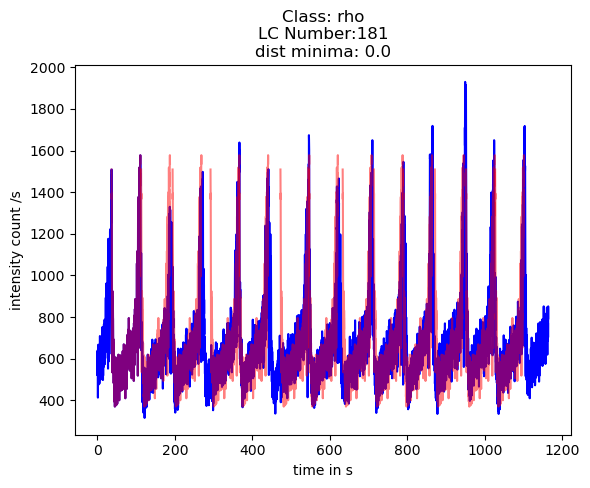

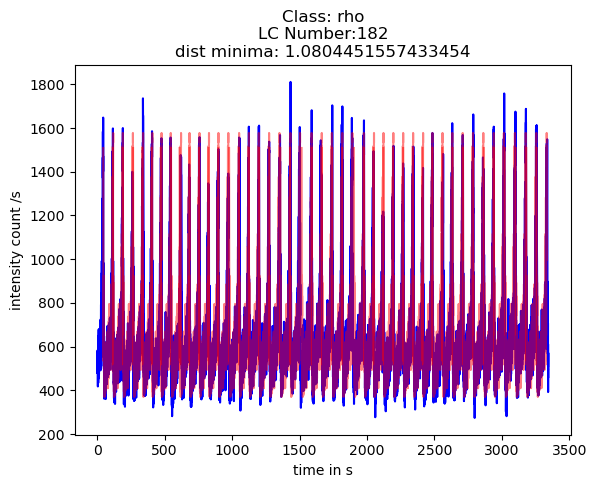

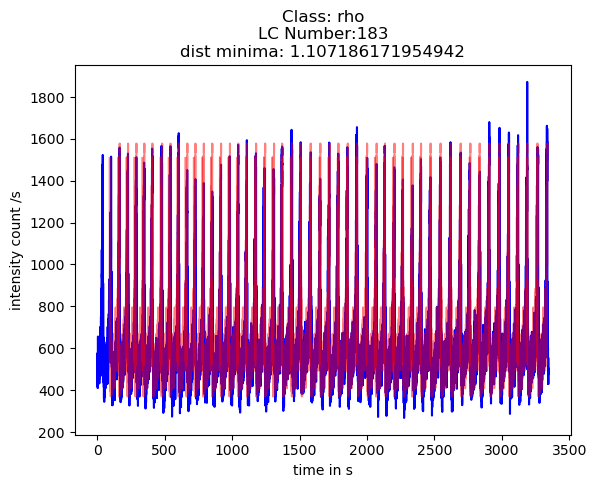

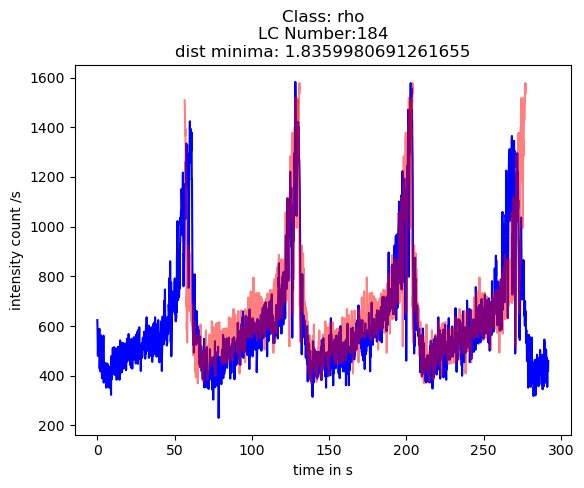

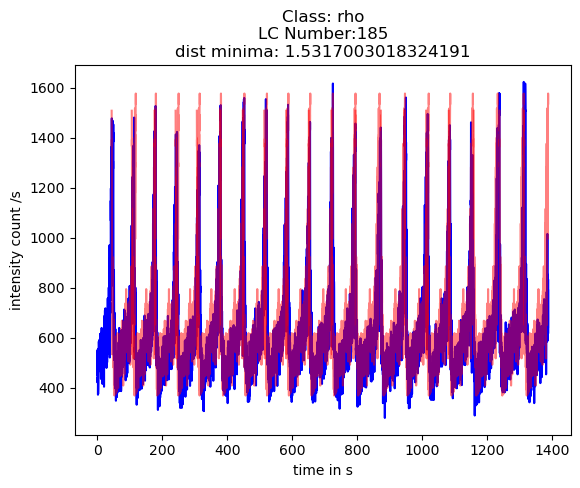

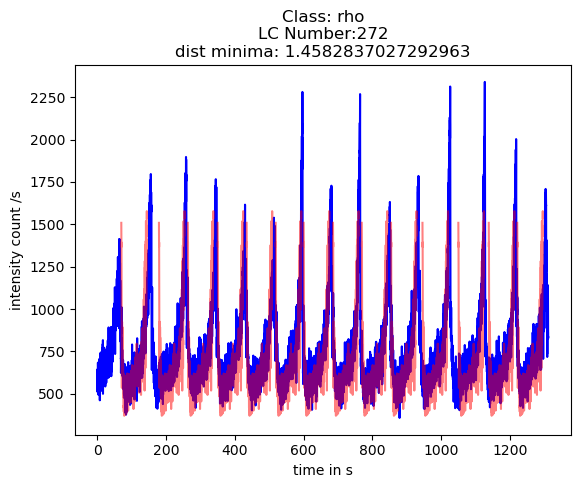

In [153]:
%matplotlib inline
plt.figure()
for index in classes_[key]:
    low=utilities.get_low(index)
    legend="Class: "+key+"\nLC Number:"+str(index)+"\ndist minima: "+str(min_distances_table[index])
    utilities.draw(shaplet,[],low,txt=legend,minimasposition=summarypositions[(summarylcindeces==index)&(summaryminimas<)])

In [677]:
def drawwithcut(index,cut):
    #TO NOT FORGET: MATPLOTLIB WIDGET & PLT FIGURE!!!
    low=utilities.get_low(index)
    legend="Class: "+key+"\nLC Number:"+str(index)+"\ndist minima: "+str(min_distances_table[index])
    utilities.draw(shaplet,[],low,txt=legend,minimasposition=summarypositions[(summarylcindeces==index)&(summaryminimas<=cut)])
    

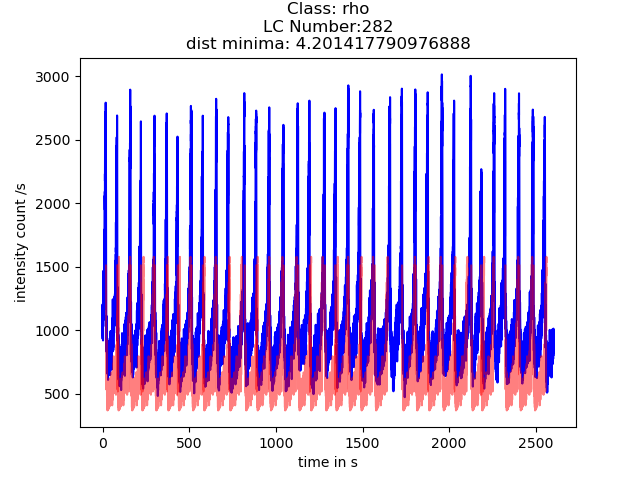

In [192]:
%matplotlib widget
index=282
low=utilities.get_low(index)
legend="Class: "+key+"\nLC Number:"+str(index)+"\ndist minima: "+str(min_distances_table[index])
utilities.draw(shaplet,[],low,txt=legend,minimasposition=summarypositions[(summarylcindeces==index)&(summaryminimas<=37)])

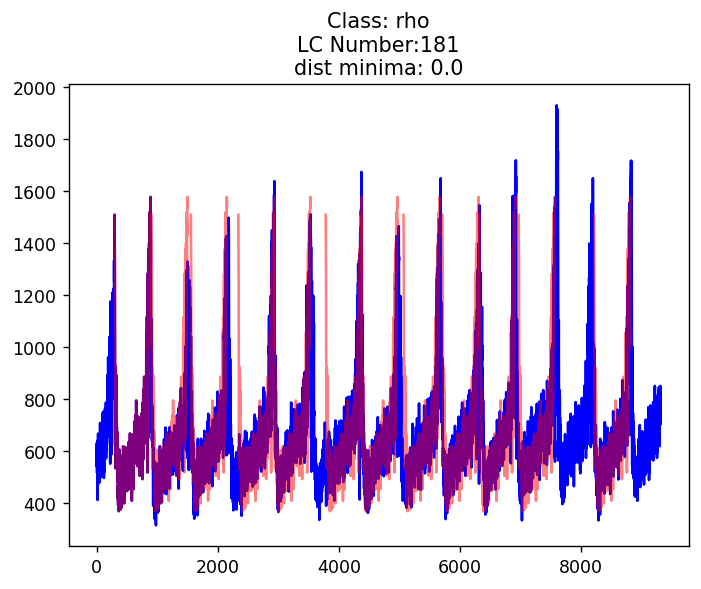

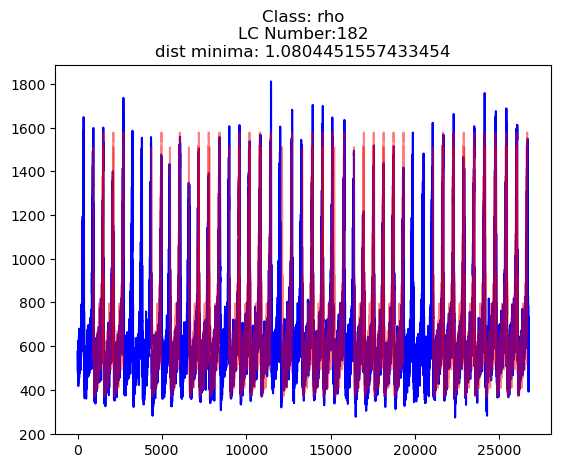

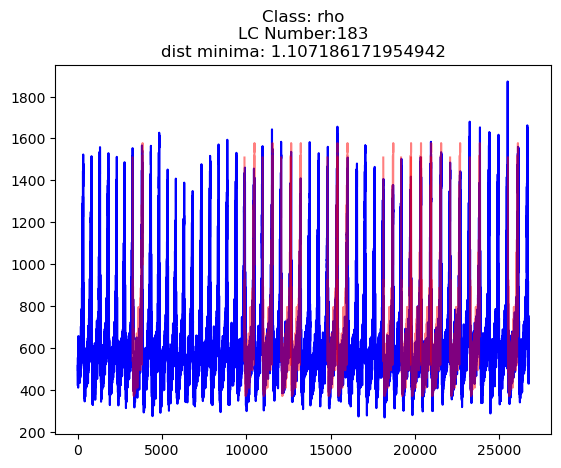

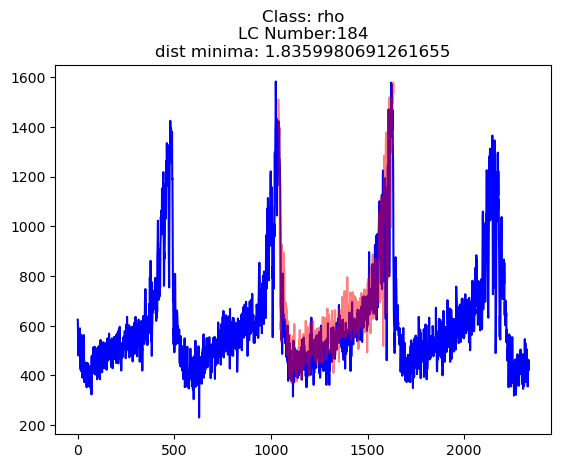

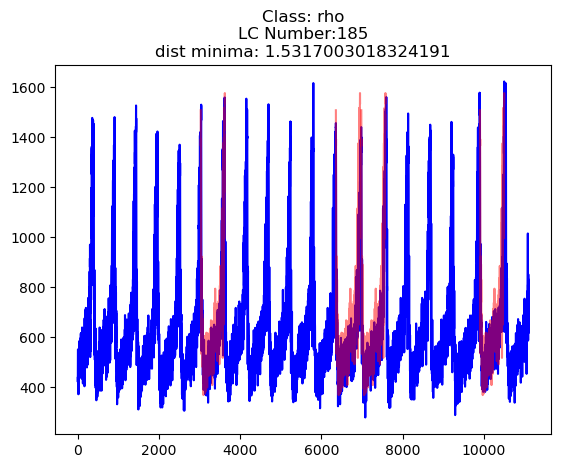

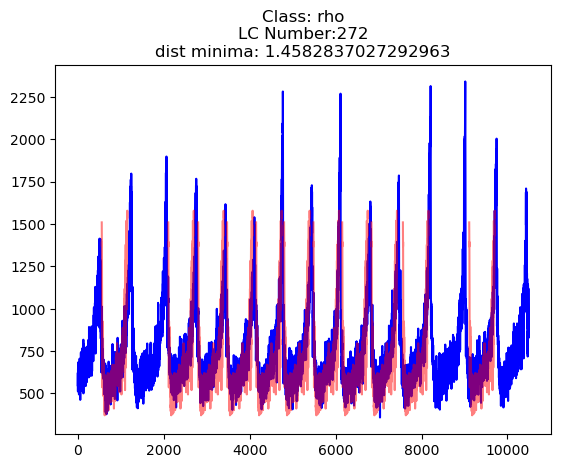

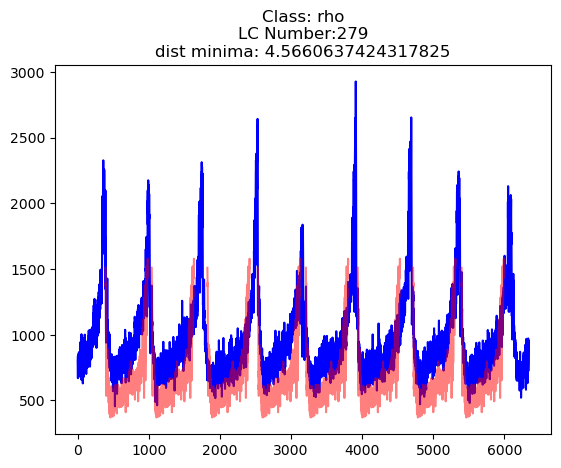

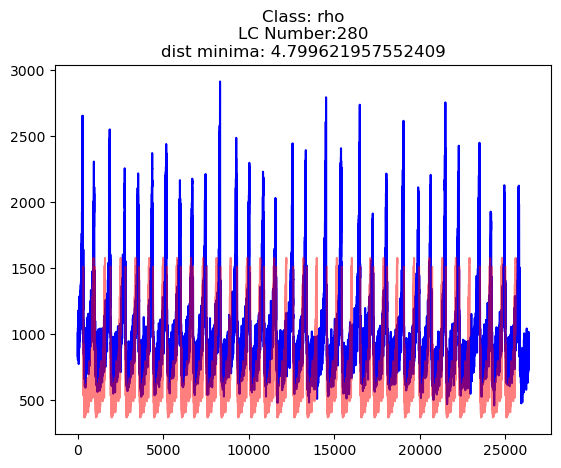

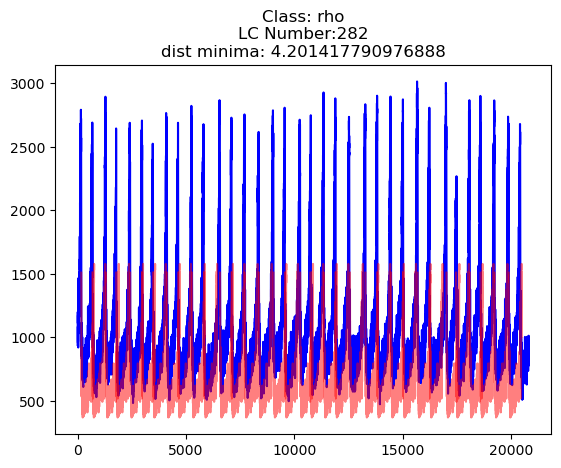

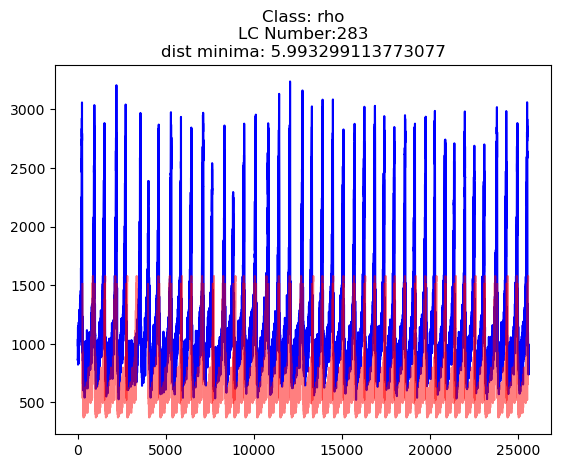

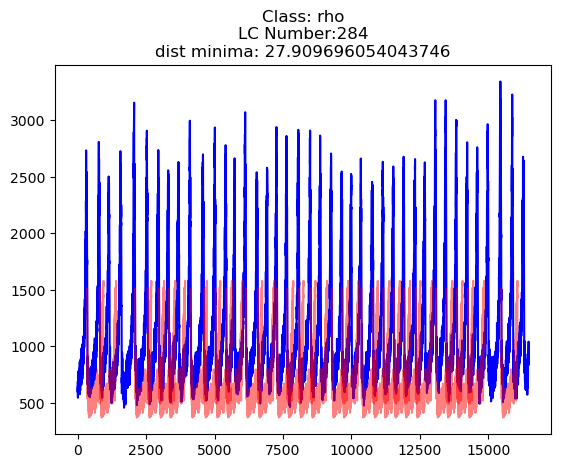

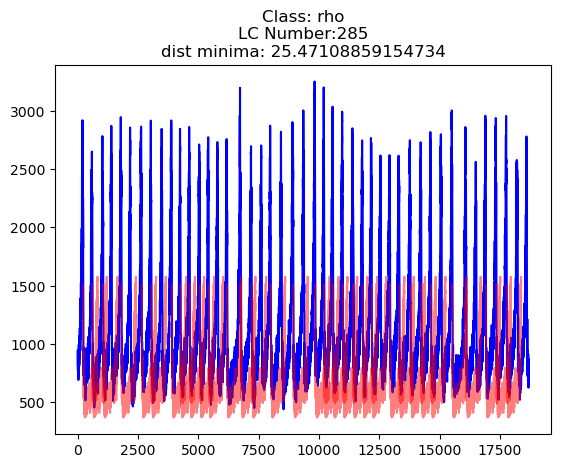

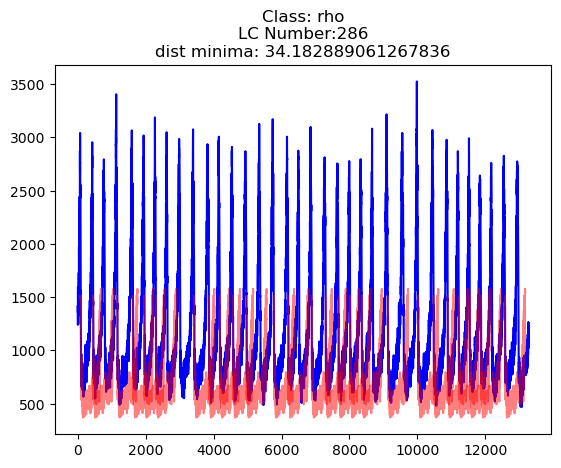

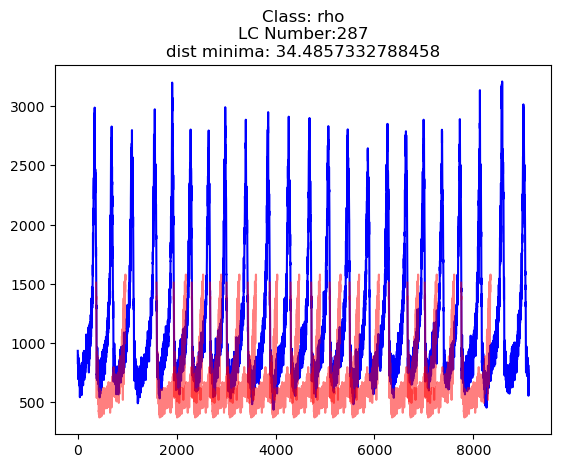

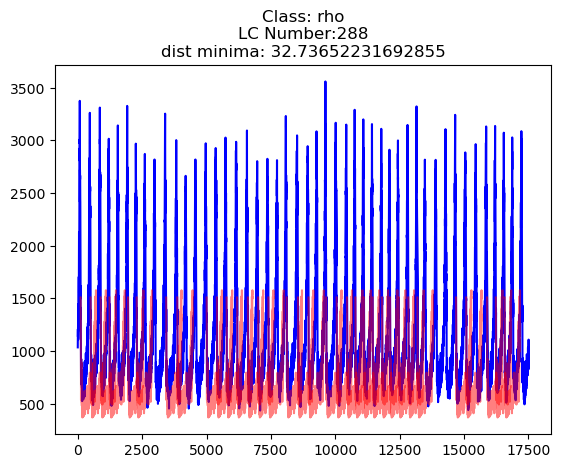

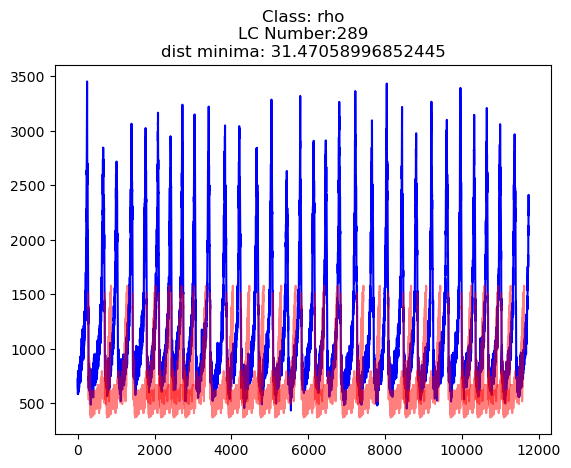

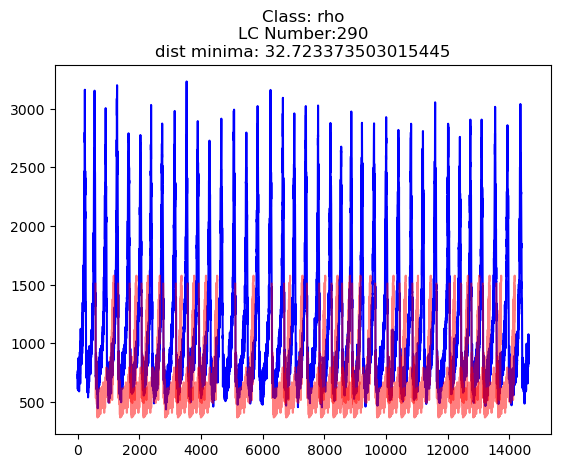

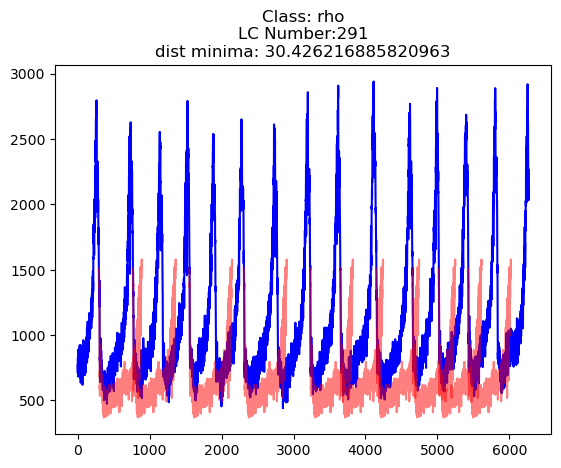

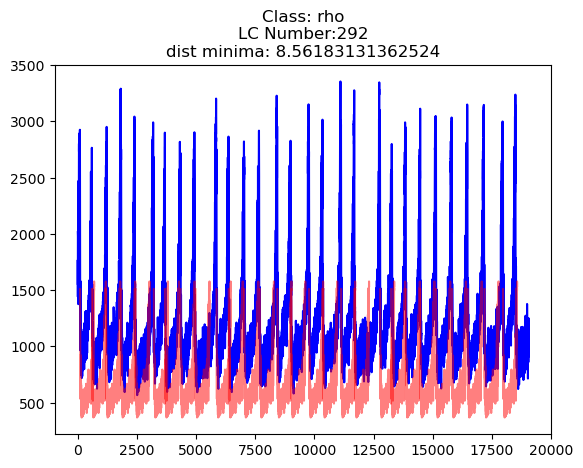

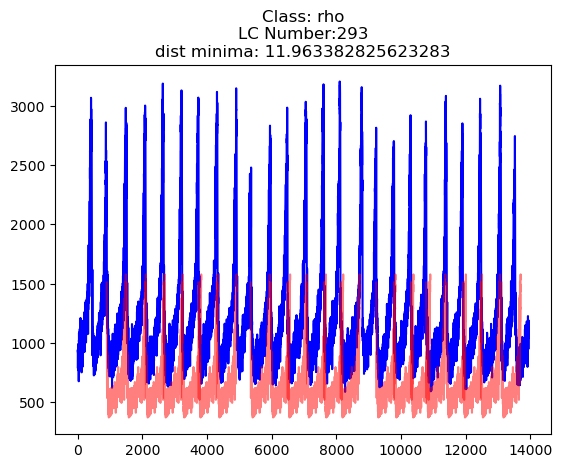

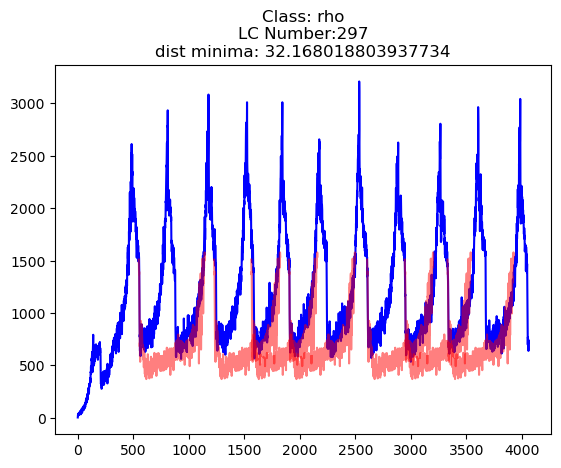

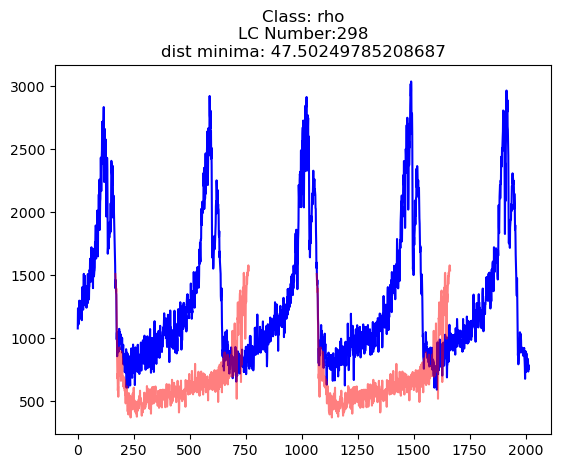

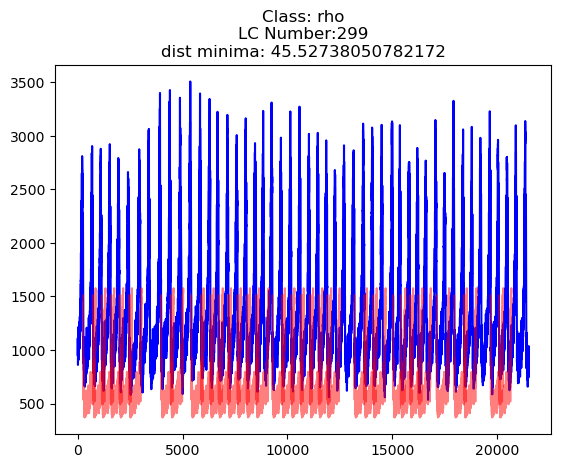

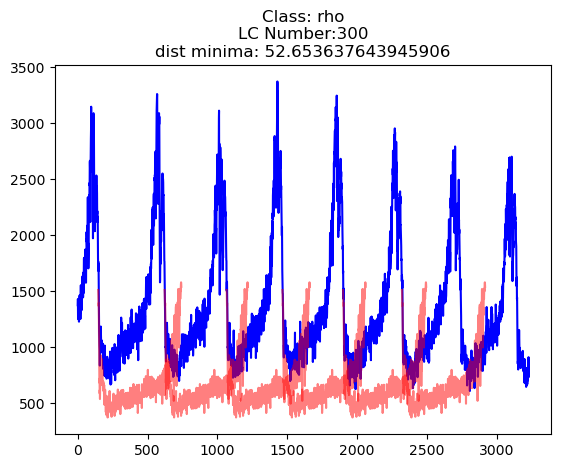

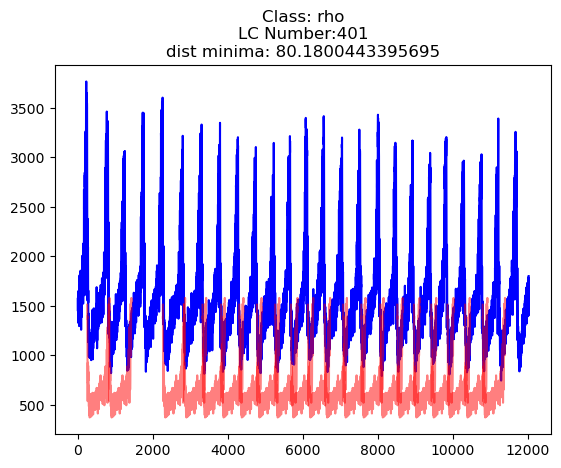

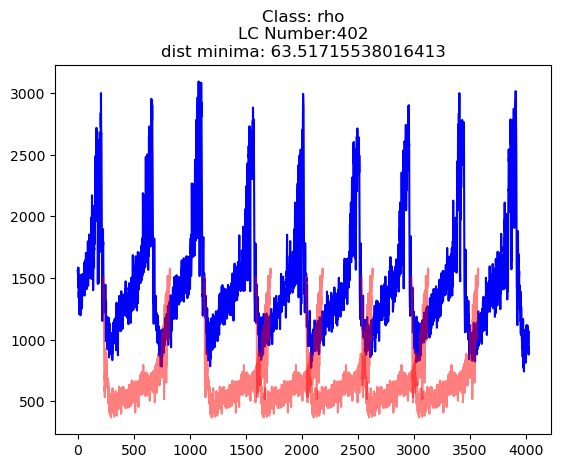

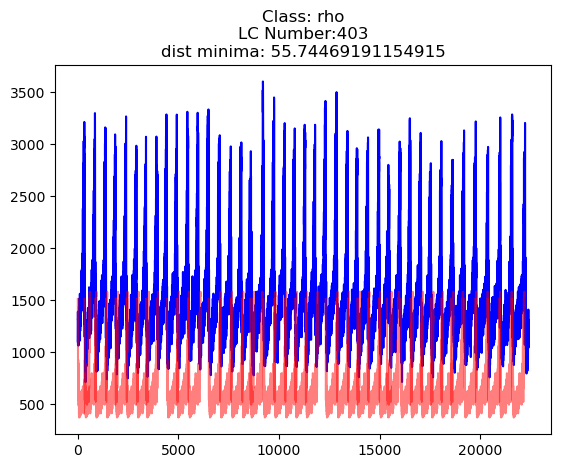

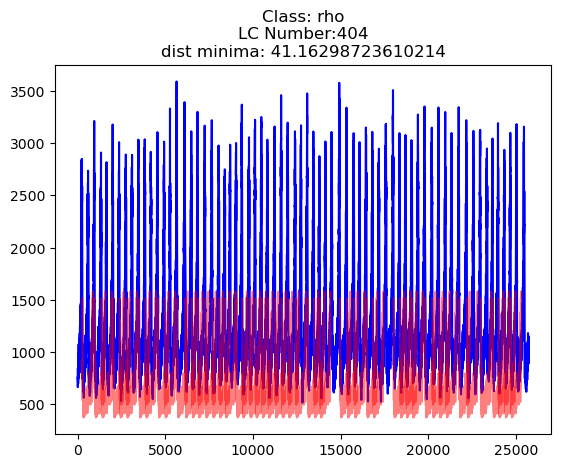

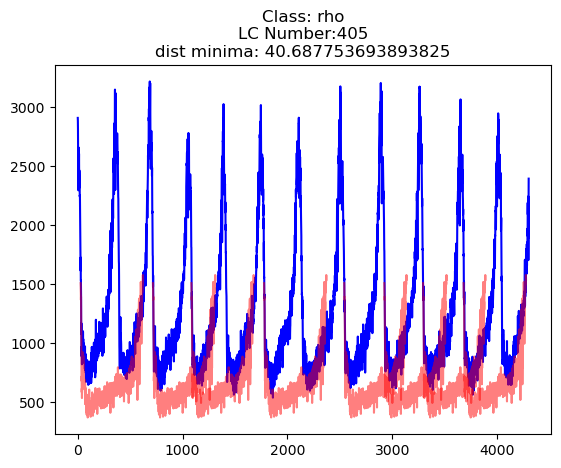

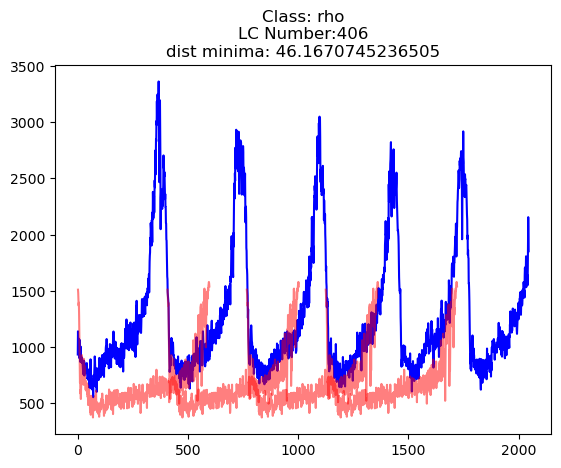

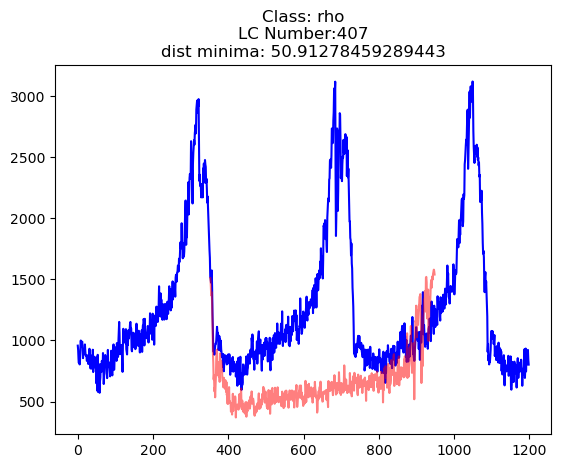

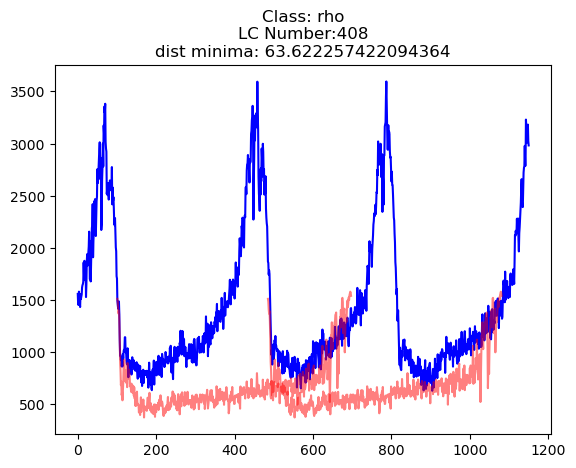

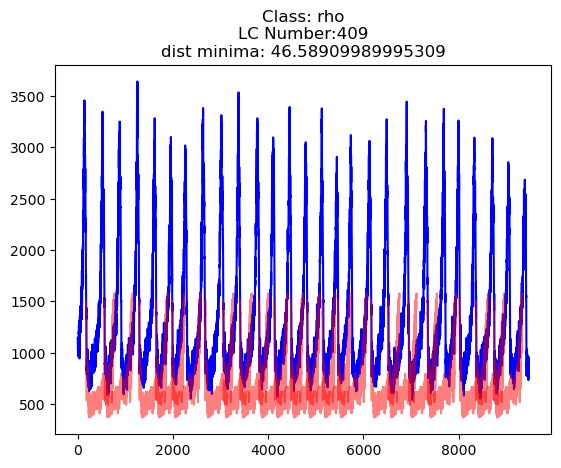

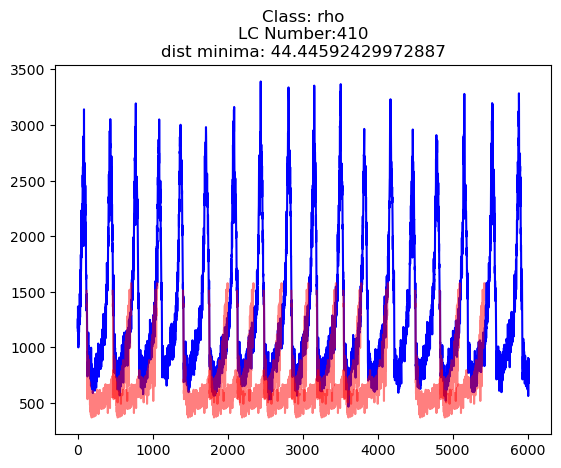

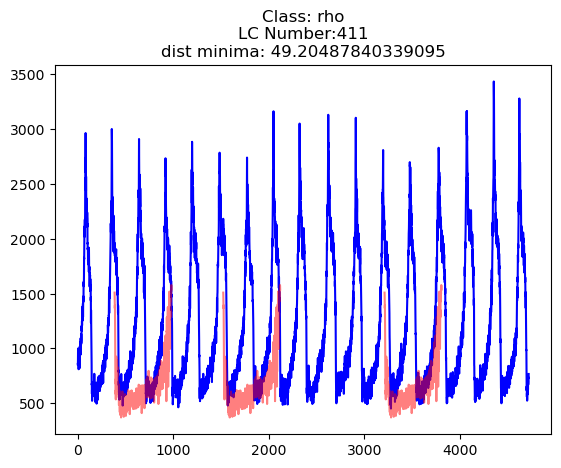

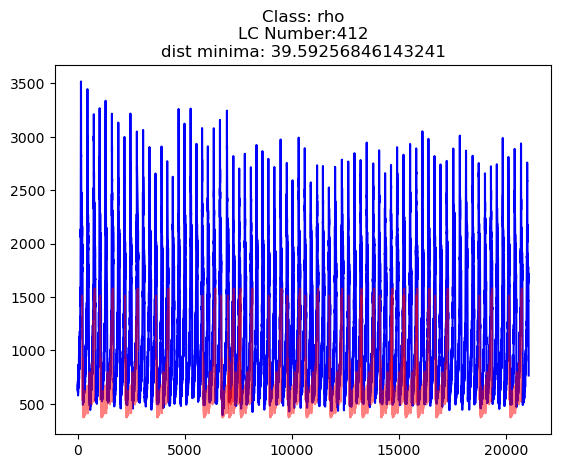

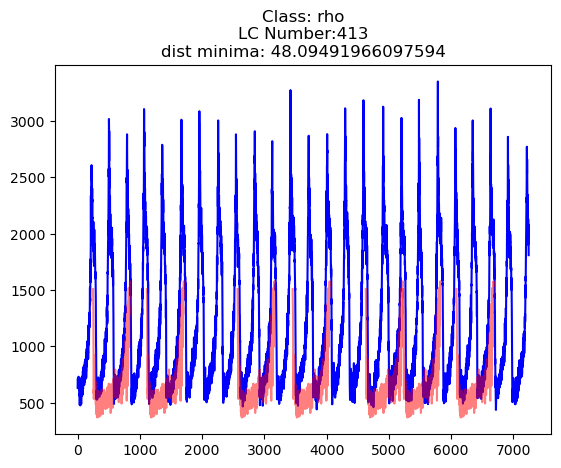

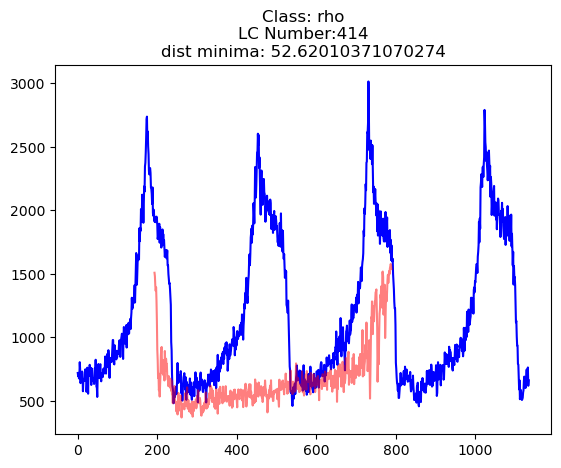

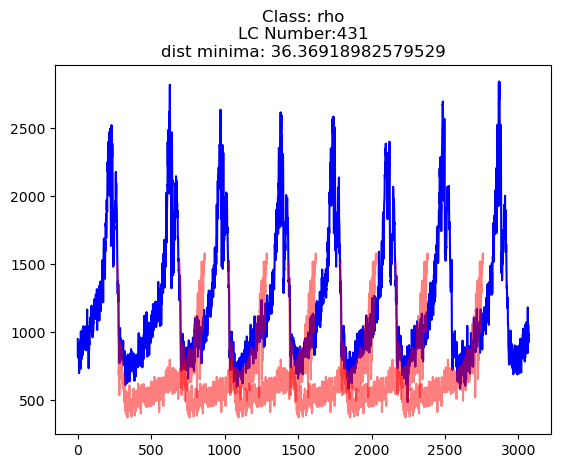

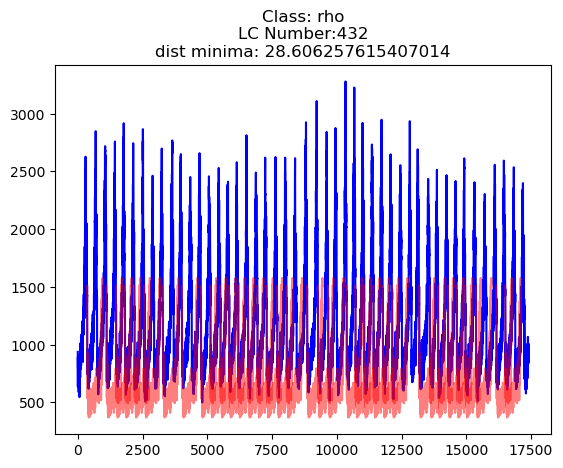

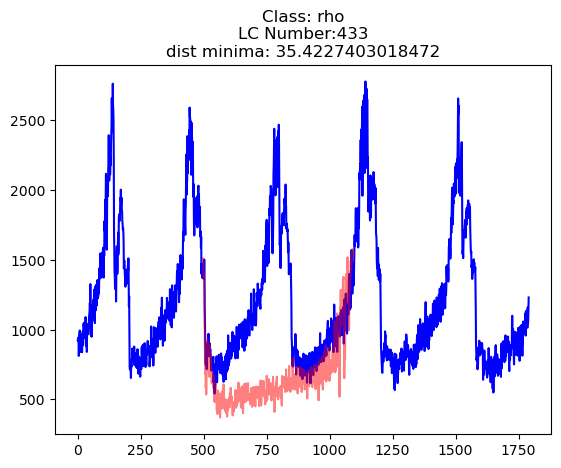

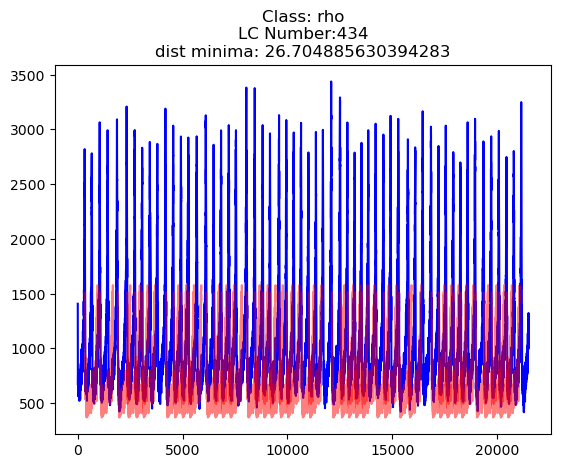

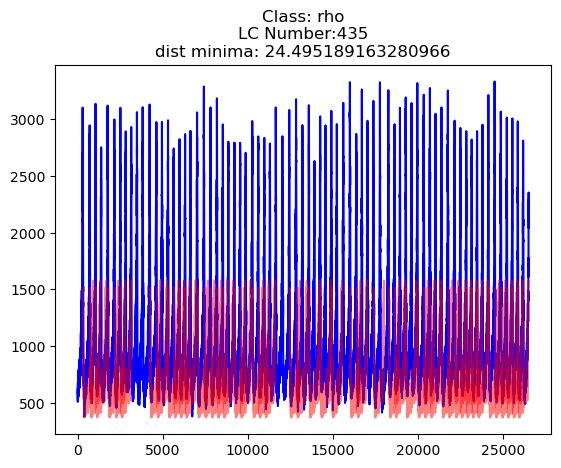

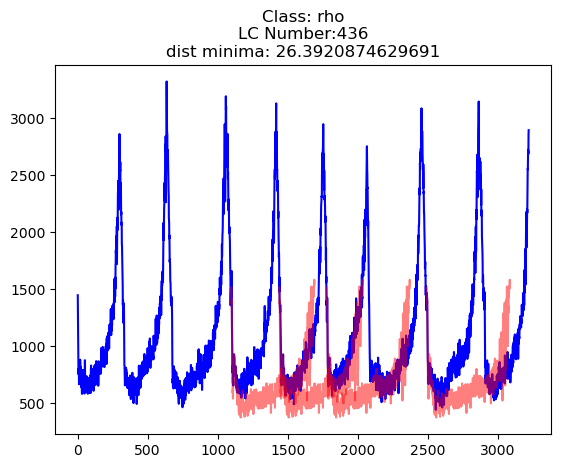

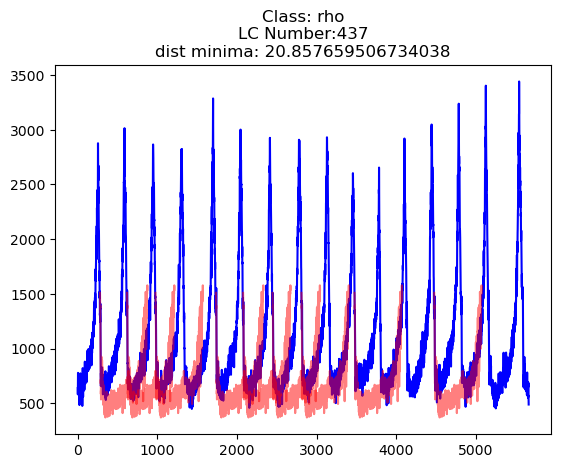

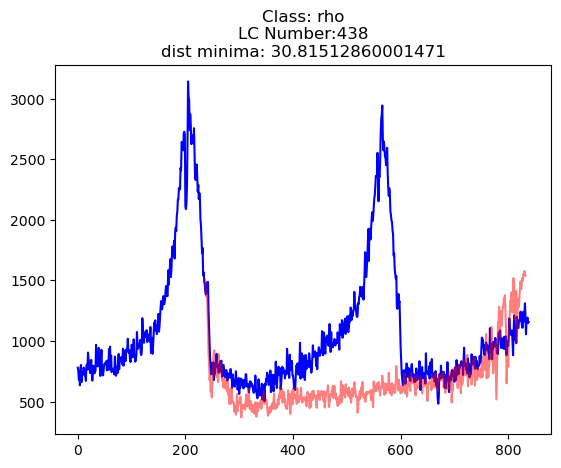

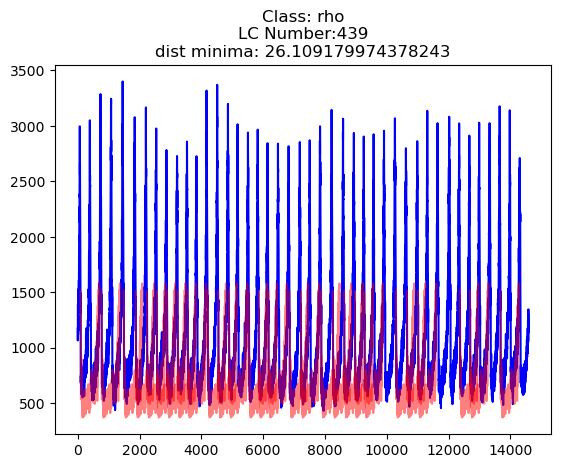

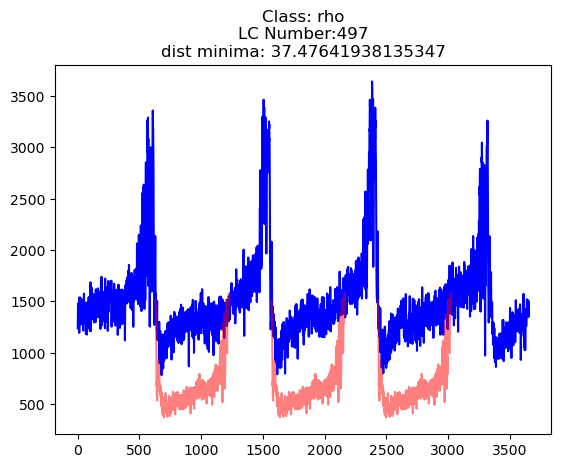

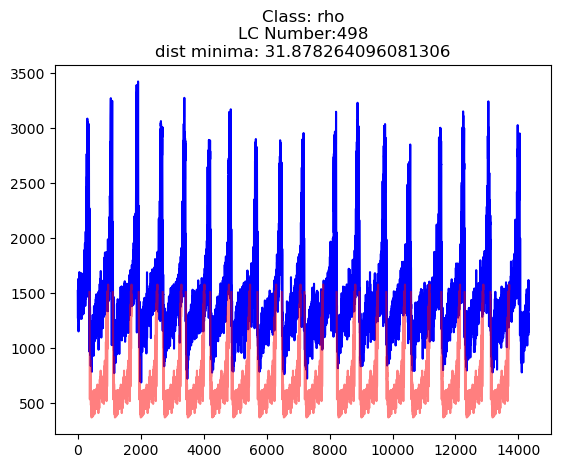

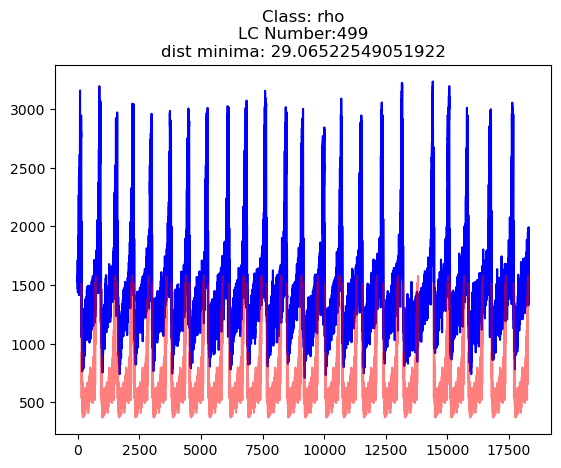

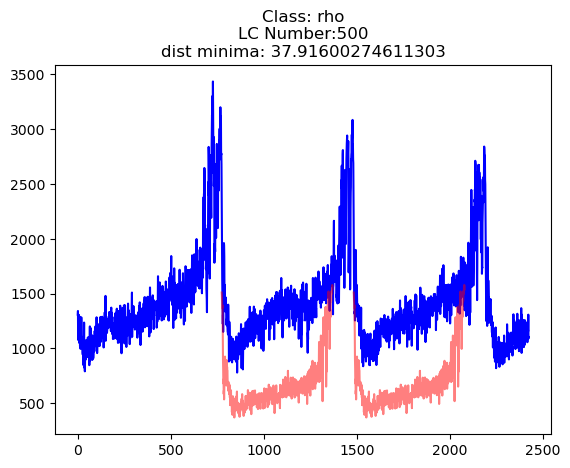

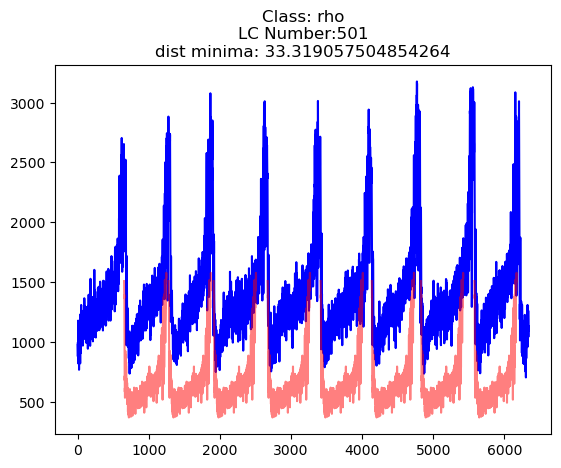

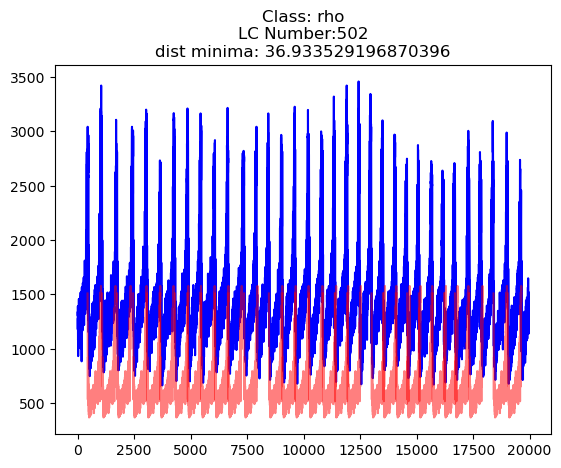

In [504]:
%matplotlib inline
for index in not_in[key]:
    low=utilities.get_low(index)
    legend="Class: "+key+"\nLC Number:"+str(index)+"\ndist minima: "+str(min_distances_table[index])
    utilities.draw(shaplet,distancestable[index],low,txt=legend)

In [310]:
lcclasses

{'lambda': [0, 1, 2, 3, 304, 305, 311, 312, 313],
 'mu': [4,
  5,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  332,
  337,
  338,
  339,
  379],
 'phi': [6,
  7,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  42,
  43,
  44,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63],
 'beta': [8,
  9,
  64,
  333,
  334,
  335,
  336,
  348,
  349,
  350,
  351,
  352,
  353,
  354,
  355,
  356,
  357,
  358,
  373,
  374,
  375,
  376,
  377,
  378,
  472,
  473,
  474,
  475,
  476,
  477,
  478,
  494,
  495,
  496,
  540,
  541,
  542,
  543,
  544],
 'delta': [18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  41,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  327,
  328,
  329,
  330,
  331,
  380,
  381,
  382,
  383,
  384,
  531,
  532,
  533,
  534,
  535,
  536,
  537,
  538,
  539],
 'theta': [29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
 

Rho signals analysis

In [426]:
#defining the noholes function 

In [189]:
def noholes(selectedpositions):
    if(len(selectedpositions)==0):   #NEED TO THINK ABOUT THE CASE WHERE I HAVE ONLY ONE ELEMENT
        return False
        
    condition=1
    selectedpositions=sorted(selectedpositions)
    for i in range(len(selectedpositions)-1):
        position= selectedpositions[i]
        nextposition=selectedpositions[i+1]
        if(abs((position+len(shaplet)-nextposition))/len(shaplet) > condition):
            print(position/8," ",nextposition/8)
       #     print(abs((position-nextposition))/len(shaplet))
            return False
    return True

In [170]:
rhomaxcuts={}
rhomincuts={}

In [172]:
summaryminimas[summarylcindeces==181]

array([0.        , 1.26028333, 1.30147307, 1.48103263, 1.81481573,
       2.18267326, 2.23606216, 2.28122369, 2.36243541, 2.37356907,
       2.4201754 , 2.53075861, 3.21021709])

In [477]:
#get positions of after doing a cut:

In [173]:
for el in lcclasses["rho"]:
    try:
        rhomaxcuts[el]=max(summaryminimas[summarylcindeces==el])
        rhomincuts[el]=min(summaryminimas[summarylcindeces==el])
    except:
        print(el)

438


In [176]:
def positionsforcut(lcindex,cut):
    return summarypositions[(summarylcindeces==lcindex)&(summaryminimas<=cut)]

In [592]:
#find minimum cut between max and min for no holes

In [162]:
def getpositionsforcut(index,cut):
    return np.array(sorted(positionsforcut(index,cut)))

In [191]:
noholes(getpositionsforcut(index,37))

1570.375   1728.25


False

In [754]:
noholes(positionsforcut(500,rhomaxcuts[500]))

True

In [814]:
def findcut(index,precision=1e-2):
    low=rhomincuts[index]
    high=rhomaxcuts[index]
    while high - low > precision:
        print(low,end=" ")
        print(high)
        mid = (low + high) / 2
        if noholes(positionsforcut(index,mid)):  
            high = mid  # Move left if `foo(mid)` is True
        else:
            low = mid   # Move right if `foo(mid)` is False
    return high

In [748]:
findcut(500)

39.44022587833051

In [311]:
chi_2=[]

In [333]:
#finding the numebr of times shaplet was found in a curve
print(np.sum(summarylcindeces==181))
#finding the number of chi2 cut equivalent shaplet in a signal
max(summaryminimas[(summarylcindeces==181).nonzero()[0]])

13


array([0.        , 1.26028333, 1.30147307, 1.48103263, 1.81481573,
       2.18267326, 2.23606216, 2.28122369, 2.36243541, 2.37356907,
       2.4201754 , 2.53075861, 3.21021709])

In [756]:
rhoefficientcut={}

In [785]:
for index in lcclasses["rho"]:
    if(not noholes(getpositionsforcut(index,rhomaxcuts[index]))):
        rhoefficientcut[index]=-1
        continue
    rhoefficientcut[index]=findcut(index)

In [786]:
rhochi2data = pd.DataFrame({'minimum cut': rhomincuts, 'efficient cut': rhoefficientcut,'max cut':rhomaxcuts})

In [787]:
rhochi2data

minimum cut  efficient cut     max cut
181     0.000000       3.210217    3.210217
182     1.080445       5.122122    6.372871
183     1.107186       8.106562    8.764623
184     1.835998       1.844723    4.069558
185     1.531700       4.979522    5.922956
272     1.458284       2.854585    8.432978
279     4.566064       7.733872    8.610747
280     4.799622      -1.000000   12.095763
282     4.201418      37.335899   39.674192
283     5.993299      -1.000000   46.366968
284    27.909696      -1.000000   45.017005
285    25.471089      43.739810   45.684131
286    34.182889      45.401310   45.401310
287    34.485733      -1.000000   43.871100
288    32.736522      -1.000000   47.808678
289    31.470590      43.143327   45.793996
290    32.723374      39.851116   39.851116
291    30.426217      30.436142   40.589304
292     8.561831      54.869264   61.242083
293    11.963383      56.469427   60.472366
297    37.649670      41.117055   45.964898
298    47.502498      47.508602   53.753376
299    45.527381      -1.000000   73.175000
300    52.653638      52.660101   65.889644
401    80.180044      -1.000000  103.750264
402    63.517155      71.724065   73.277754
403    55.744692      91.971674   95.451868
404    41.162987      55.946657   60.410893
405    40.687754      52.350868   53.474723
406    46.167075      46.172675   57.635934
407    52.072087      52.072087   52.072087
408    63.622257      63.629895   67.532840
409    46.589100      59.929589   60.107814
410    44.445924      52.696183   53.292275
411    49.204878      -1.000000   53.556924
412    39.592568      -1.000000   67.496793
413    48.094920      -1.000000   58.981527
414    52.620104      52.620104   52.620104
431    36.369190      36.375925   39.817704
432    28.606258      46.546662   47.380886
433    35.422740      35.422740   35.422740
434    26.704886      39.185491   39.185491
435    24.495189      -1.000000   37.871559
436    26.392087      26.397483   37.441229
437    20.857660      20.865183   36.265610
438    30.815129      30.815129   30.815129
439    26.109180      -1.000000   39.059361
497    37.476419      37.485657   42.205826
498    31.878264      48.538750   48.538750
499    29.065225      -1.000000   65.059640
500    39.433189      39.440226   41.234720
501    33.319058      59.570684   59.570684
502    36.933529      88.830881   89.207365

<Figure size 640x480 with 0 Axes>

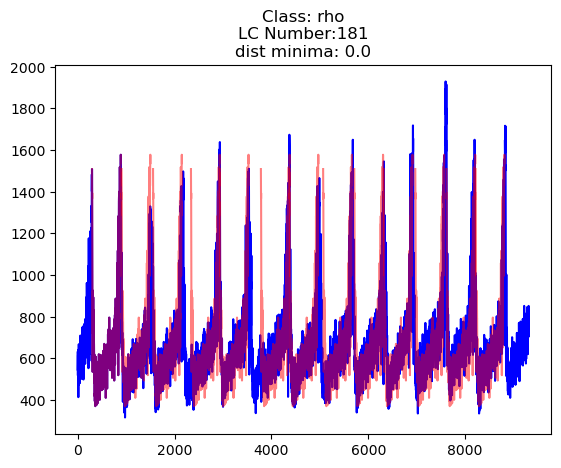

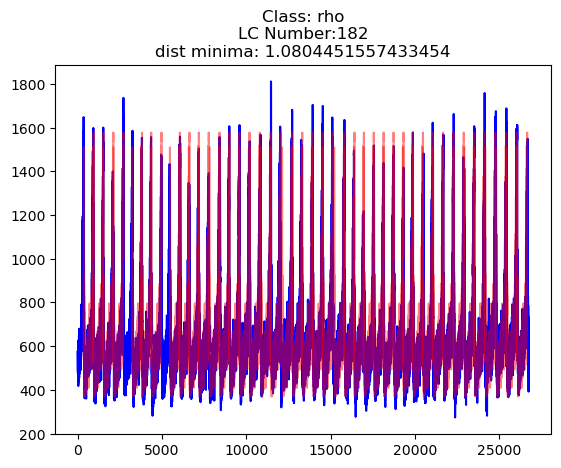

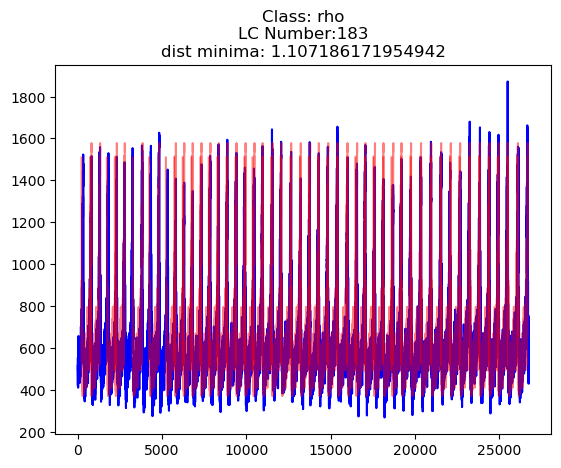

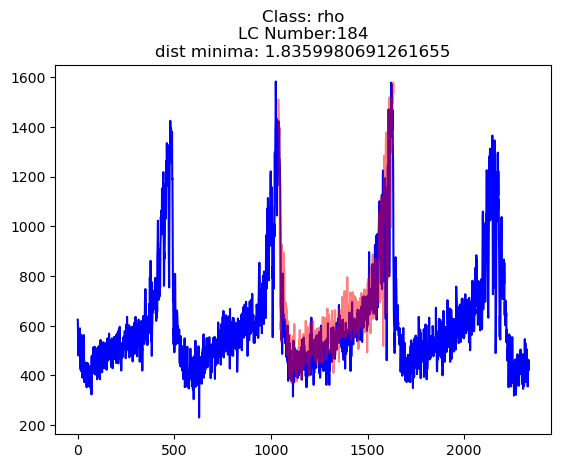

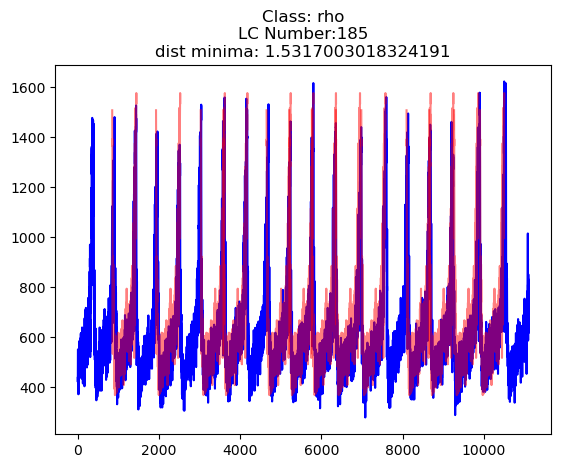

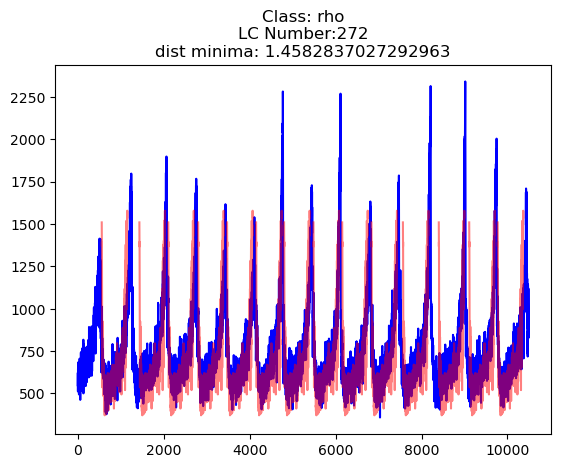

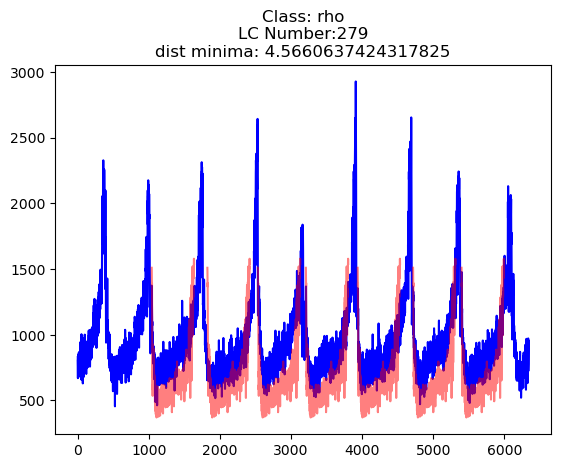

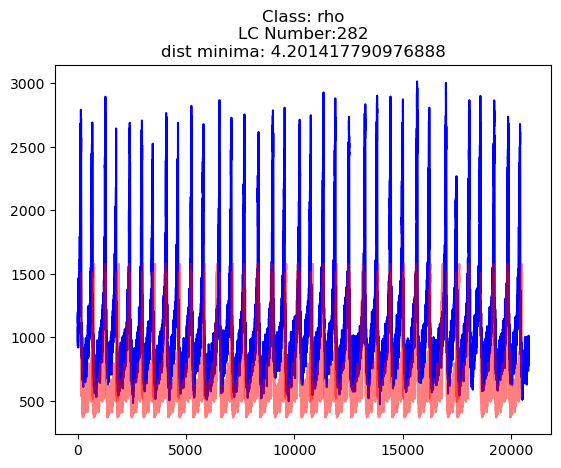

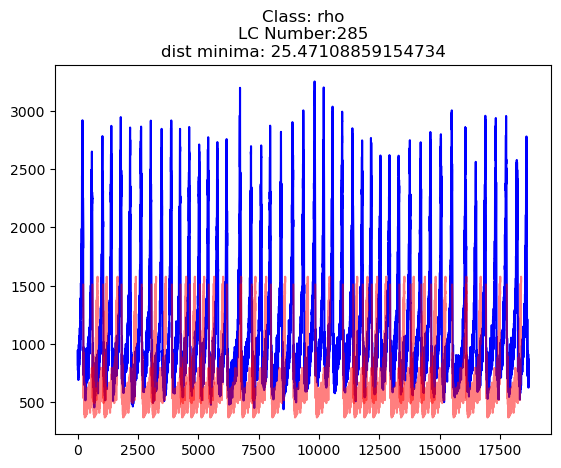

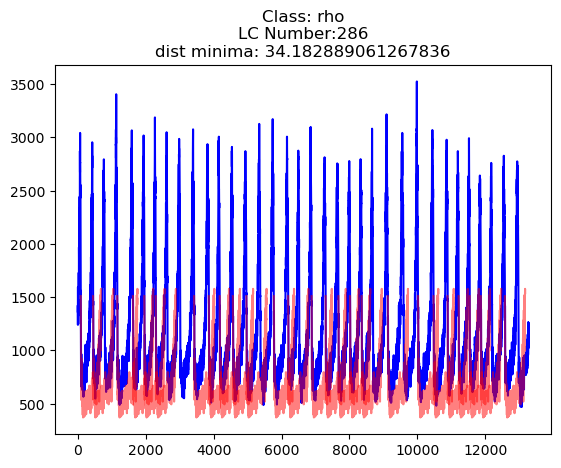

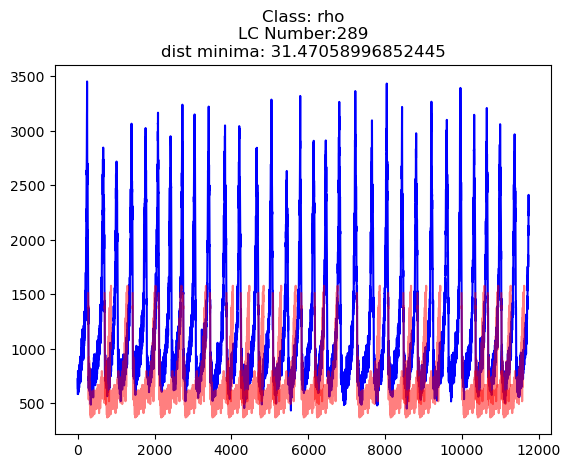

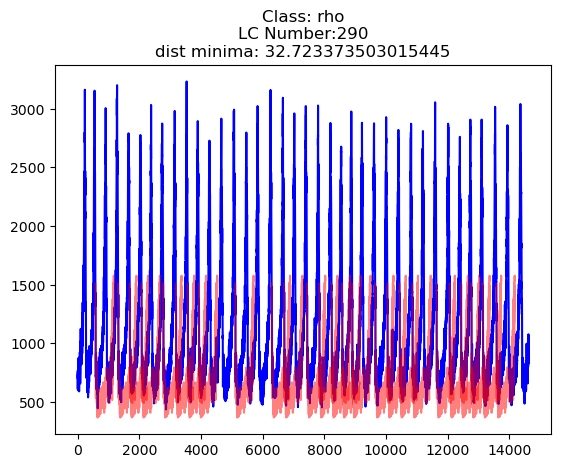

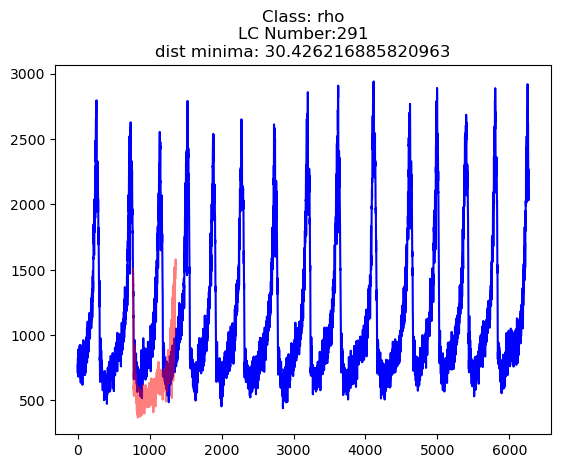

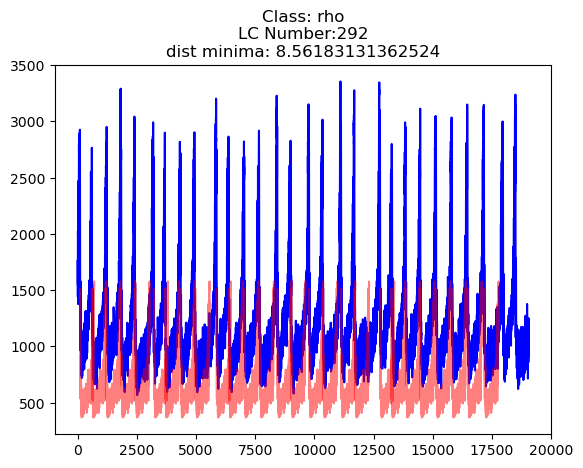

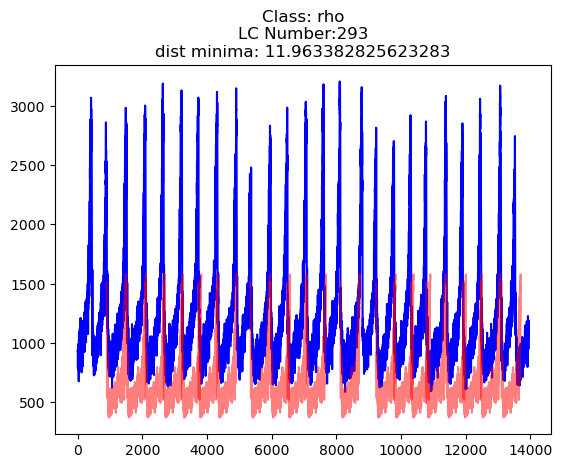

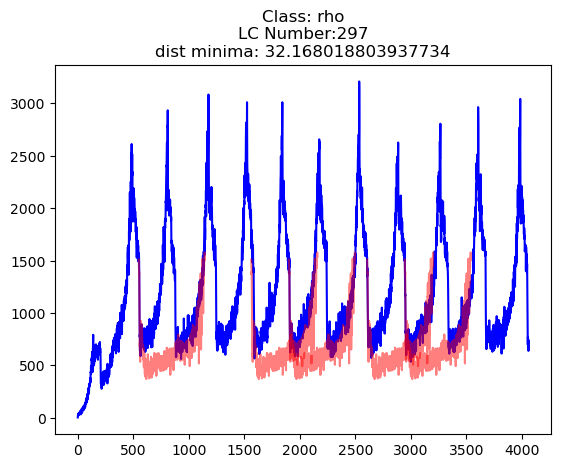

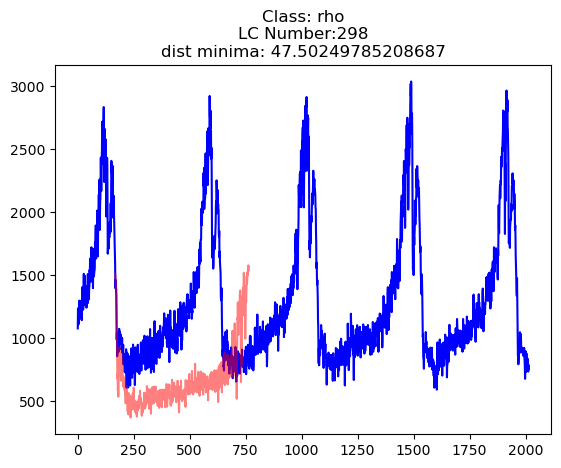

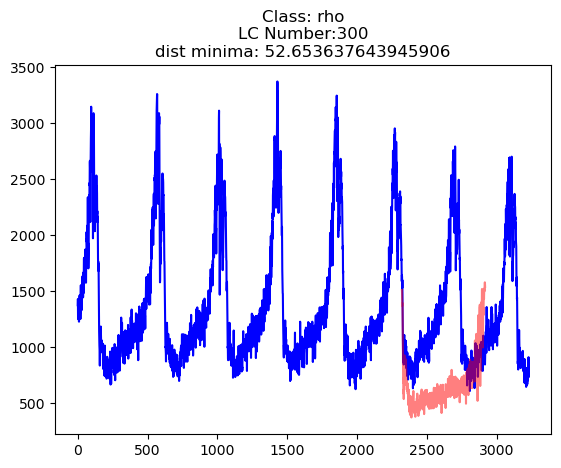

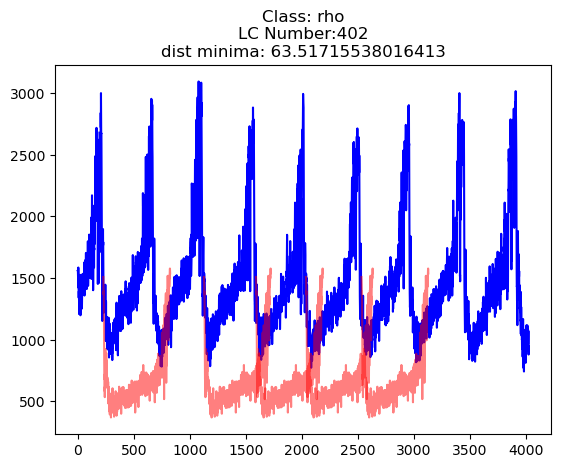

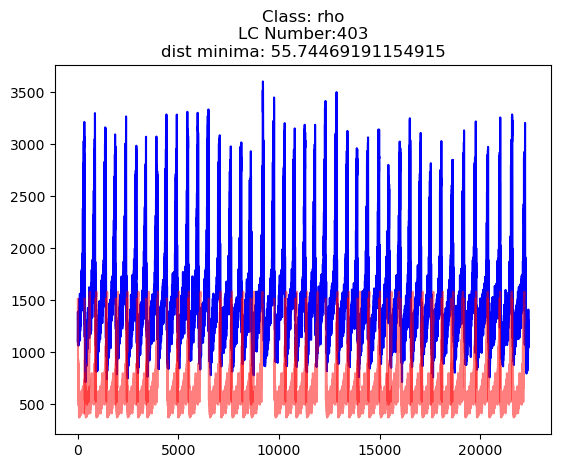

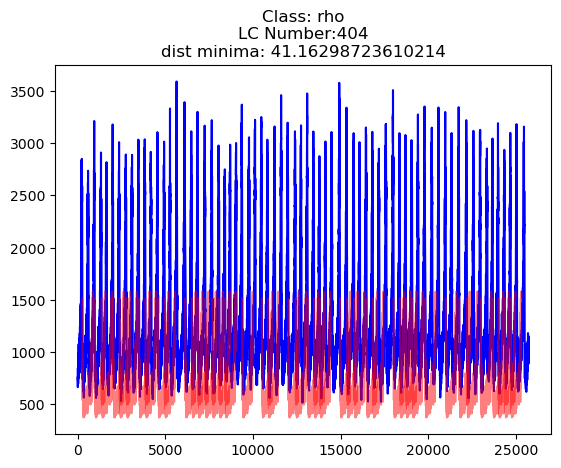

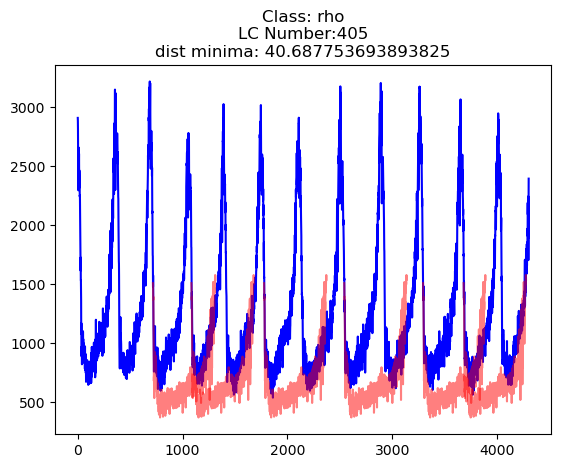

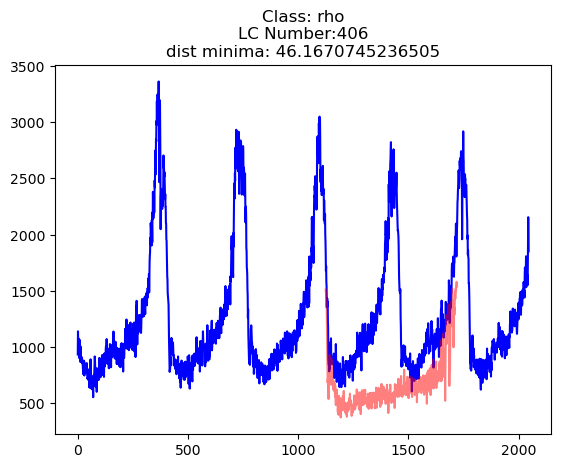

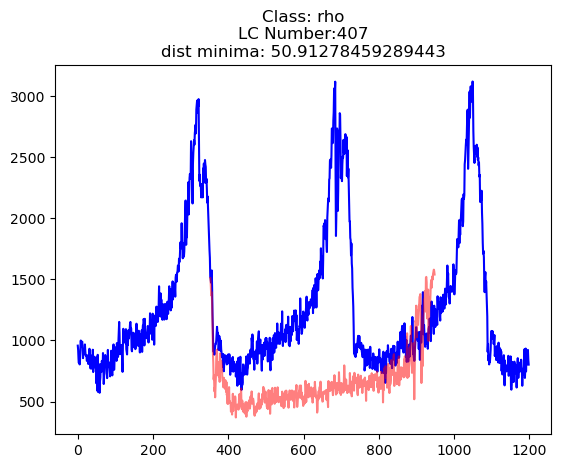

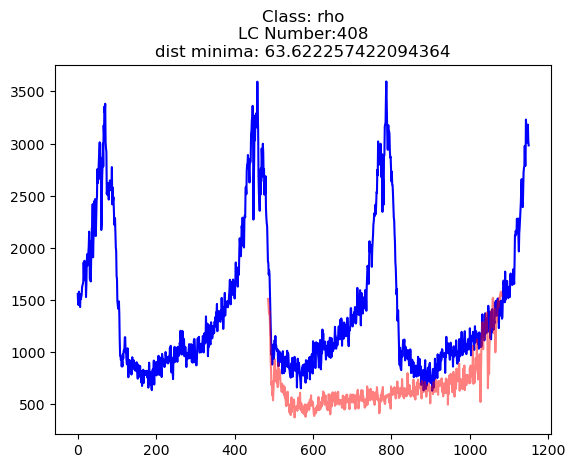

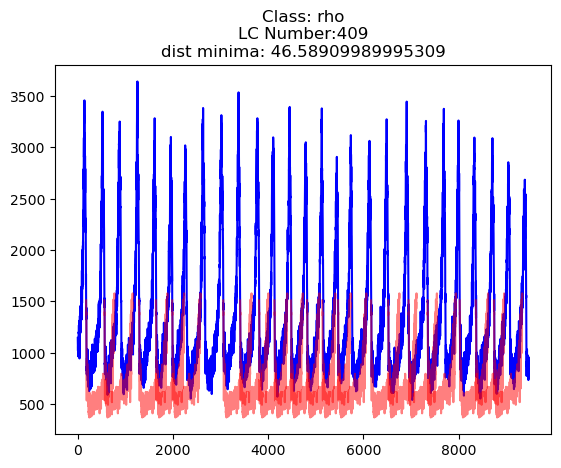

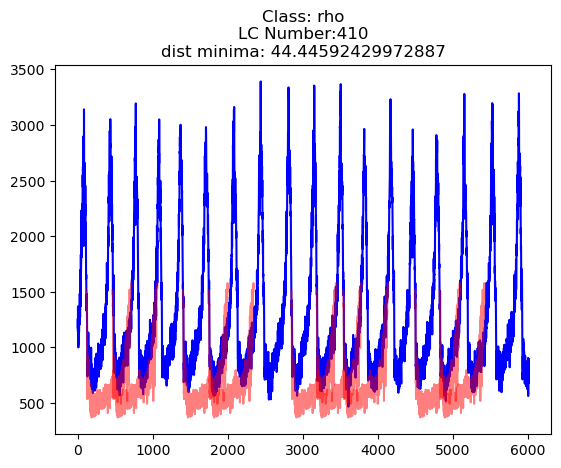

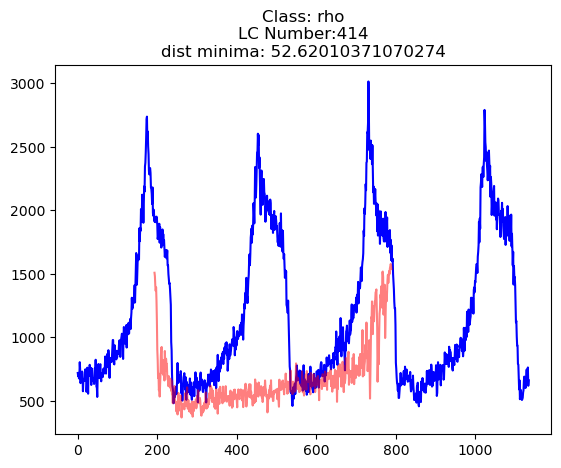

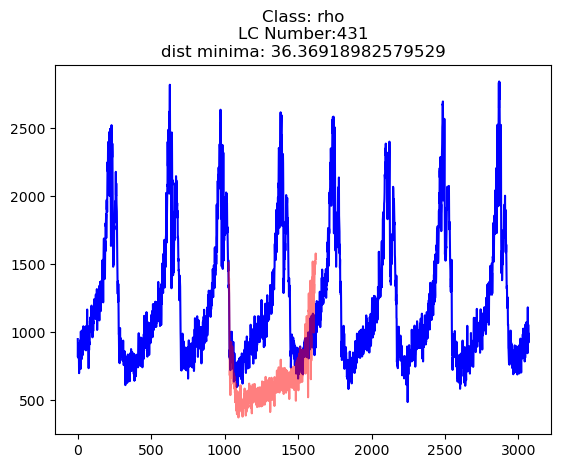

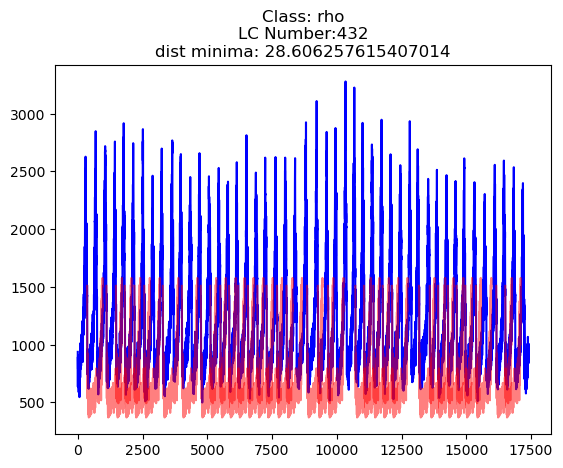

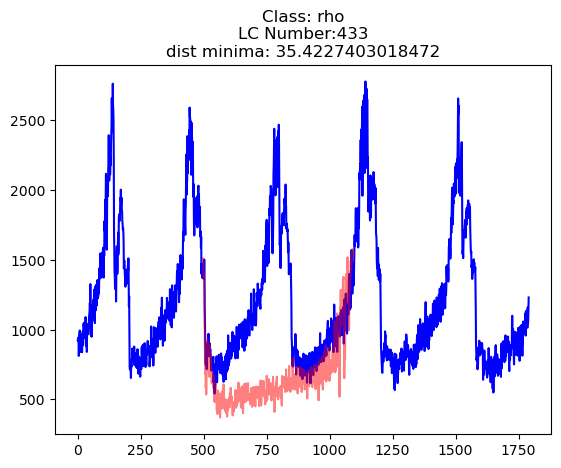

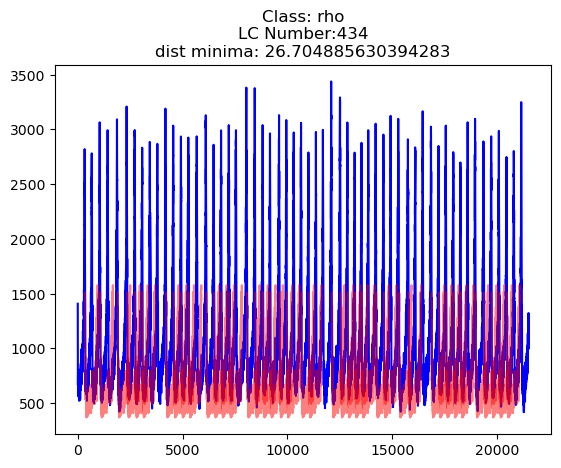

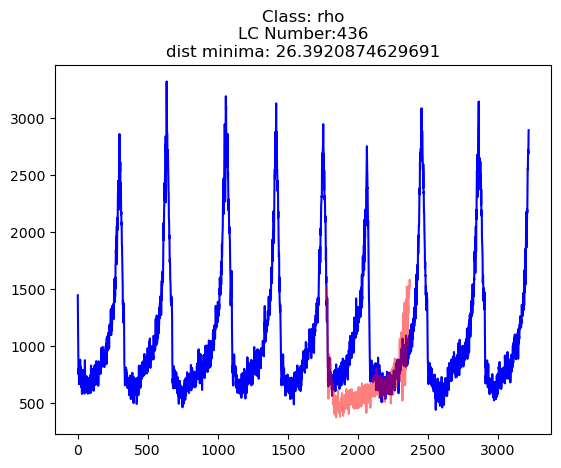

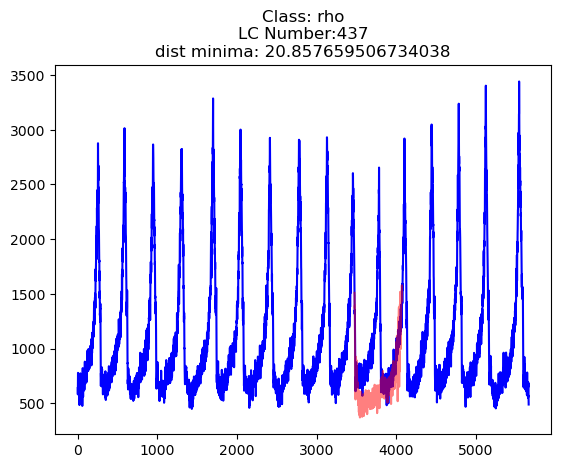

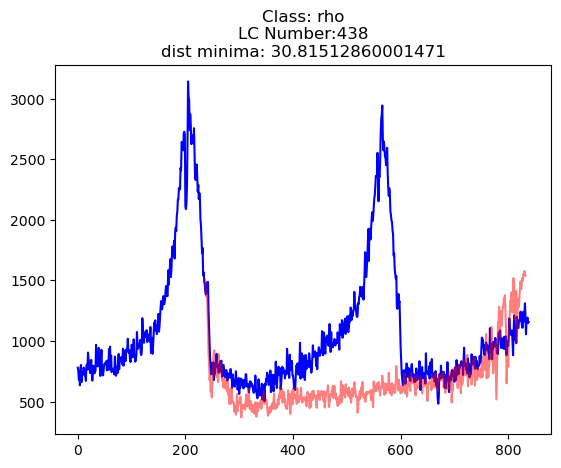

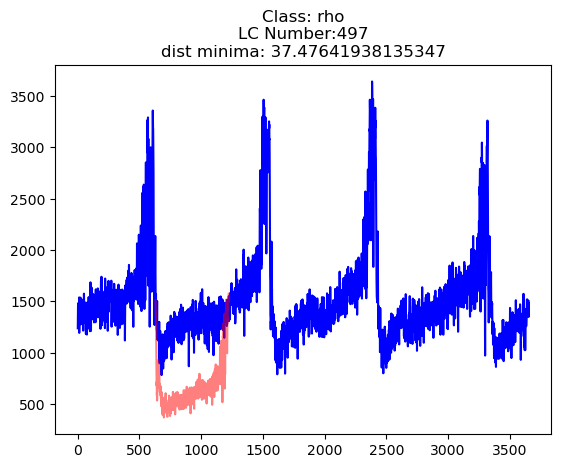

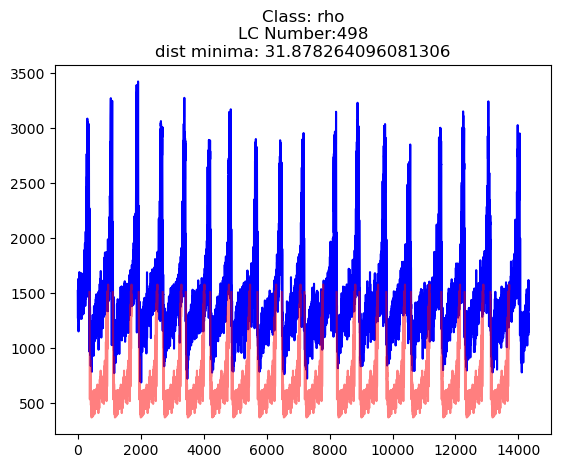

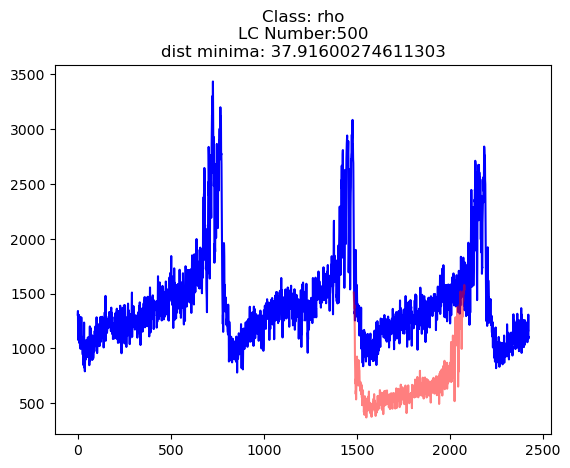

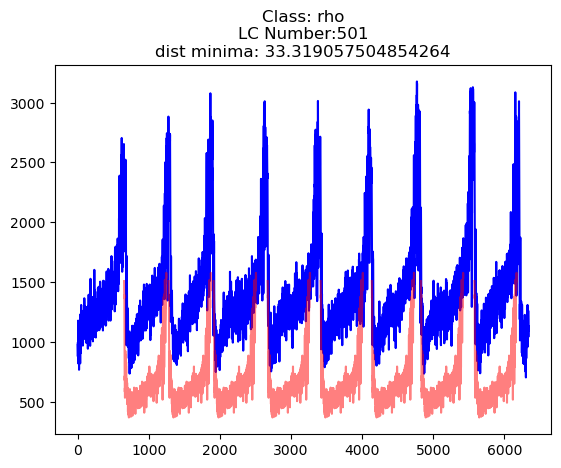

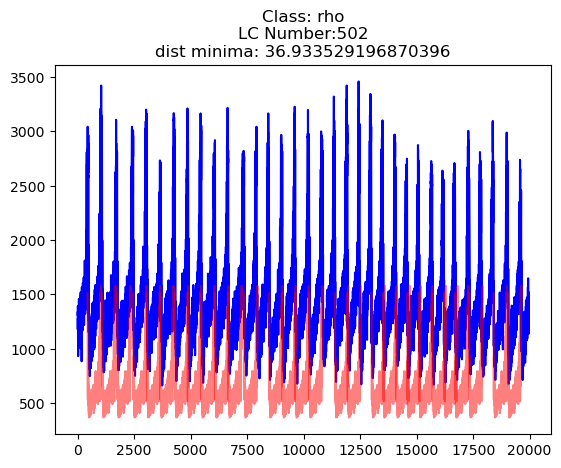

In [791]:
%matplotlib inline
plt.figure()
for ind in lcclasses["rho"]:
    if(rhoefficientcut[ind]==-1):
        continue
    drawwithcut(ind,rhoefficientcut[ind])

In [796]:
np.sort(summarypositions[np.where(summarylcindeces==412)])

array([  197,  1042,  2206,  3649,  5834,  6697,  7014,  7562,  8925,
        9790, 10633, 11753, 12662, 13250, 14112, 14655, 15264, 15837,
       16693, 18763, 20154])

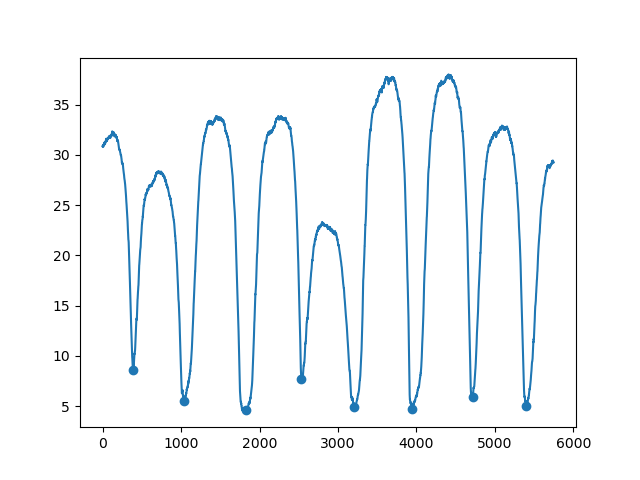

In [829]:
%matplotlib widget
index=279
plt.figure()
plt.plot(distancestable[index])
plt.scatter(summarypositions[np.where(summarylcindeces==index)],distancestable[index][summarypositions[np.where(summarylcindeces==index)]])
plt.show()

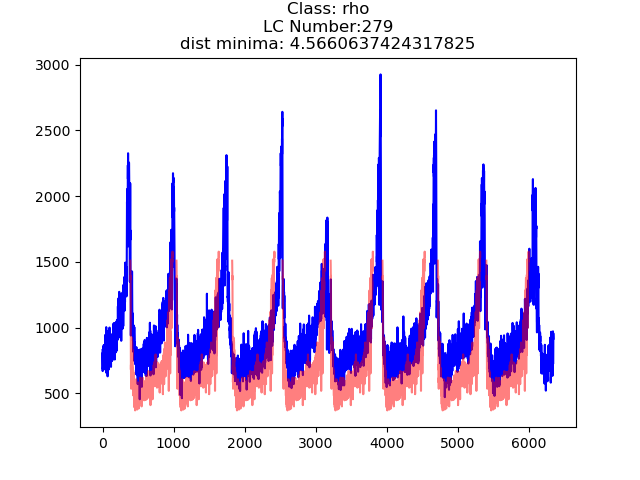

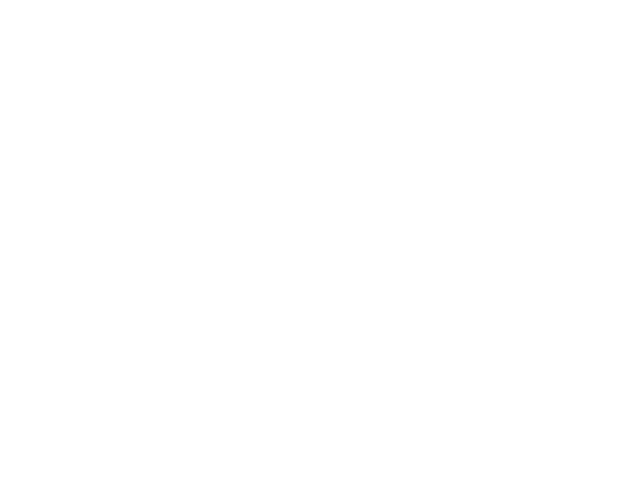

In [833]:
%matplotlib widget
index=279
plt.figure()
drawwithcut(index,findcut(index,5))

In [815]:
findcut(279)

4.5660637424317825 8.610746923296732
6.588405332864257 8.610746923296732
7.5995761280804945 8.610746923296732
7.5995761280804945 8.105161525688613
7.5995761280804945 7.852368826884554
7.725972477482524 7.852368826884554
7.725972477482524 7.7891706521835395
7.725972477482524 7.757571564833032
7.725972477482524 7.741772021157779


7.733872249320152

True

In [819]:
getpositionsforcut(279,4.567)

array([1823])

##### SAVE THE PLOTS AND IMPORTANT FIGURES TO WHY WE CHOOSE A CERTAIN CUT 

In [838]:
findcut(index,2)

4.5660637424317825 8.610746923296732
6.588405332864257 8.610746923296732


8.610746923296732

In [868]:
numberofshaplets={}

In [869]:
qualityofshaplet={}

In [845]:
getpositionsforcut(181,rhoefficientcut[181])

array([ 294,  904, 1554, 2337, 2932, 3781, 4372, 5066, 5709, 6317, 6969,
       7612, 8214])

In [870]:
for el in lcclasses["rho"]:
    if(rhomaxcuts[el]<=9):
        numberofshaplets[el]=len(getpositionsforcut(el,rhomaxcuts[el]))
        qualityofshaplet[el]=numberofshaplets[el]/(len(utilities.get_low(el))/len(shaplet))

In [875]:
qualityofshaplet

{181: 0.8335302330576737,
 182: 0.9819446002018616,
 183: 1.093529213861164,
 184: 0.7670235546038544,
 185: 0.9678465279654147,
 272: 0.8532634587898998,
 279: 0.7529560145041778}

In [860]:
qualityshapletwithefficient={181: 0.8335302330576737,
 182: 0.9373107547381405,
 183: 1.004261522933722,
 184: 0.2556745182012848,
 185: 0.699000270197244,
 272: 0.7963792282039065,
 279: 0.6588365126911555,
 280: 0.0,
 283: 0.0,
 284: 0.0,
 287: 0.0,
 288: 0.0,
 299: 0.0,
 401: 0.0,
 411: 0.0,
 412: 0.0,
 413: 0.0,
 435: 0.0,
 439: 0.0,
 499: 0.0}


(array([2., 0., 2., 0., 0., 0., 2., 0., 0., 1.]),
 array([0.75295601, 0.78701333, 0.82107065, 0.85512797, 0.88918529,
        0.92324261, 0.95729993, 0.99135725, 1.02541457, 1.05947189,
        1.09352921]),
 <BarContainer object of 10 artists>)

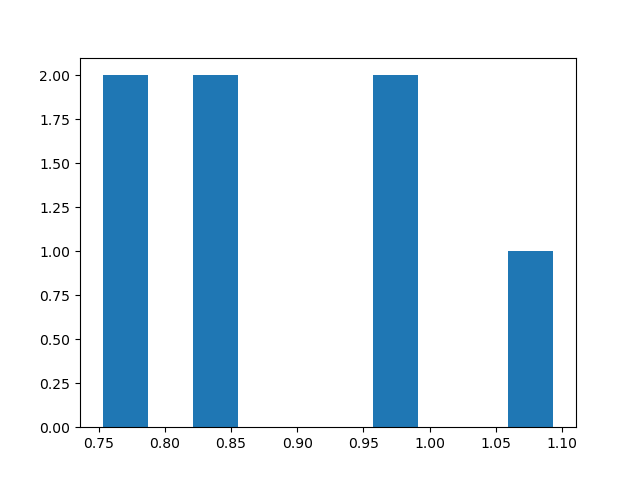

In [874]:
plt.figure()
plt.hist(qualityofshaplet.values())

In [877]:
summarypositions[0]

294

In [878]:
with open("computed_data.pkl", "rb") as f:
    x = pickle.load(f)  # Assuming it's a dictionary

print(x.keys())

dict_keys(['min_distances_table', 'argsort_min', 'argsort_min_without_nan', 'dist_table', 'first_column', 'second_column', 'third_column'])


In [882]:
summarypositionsx=np.array(x["second_column"]).astype(int)

In [885]:
summarypositionsx[0]

294

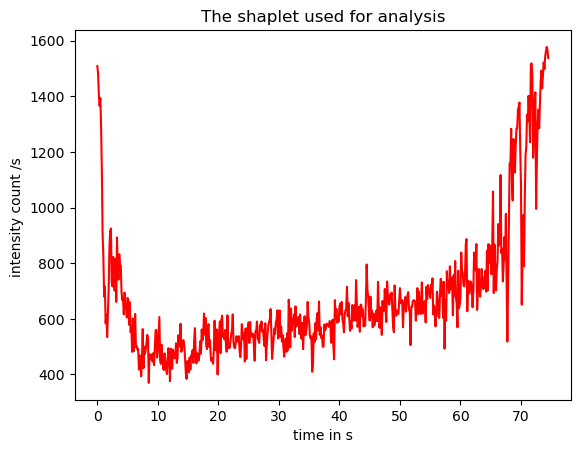

In [70]:
plt.figure()
plt.title("The shaplet used for analysis")
plt.xlabel("time in s")
plt.ylabel("intensity count /s ")
plt.plot(np.array(range(len(shaplet)))*0.125,shaplet,color='r')
plt.show()

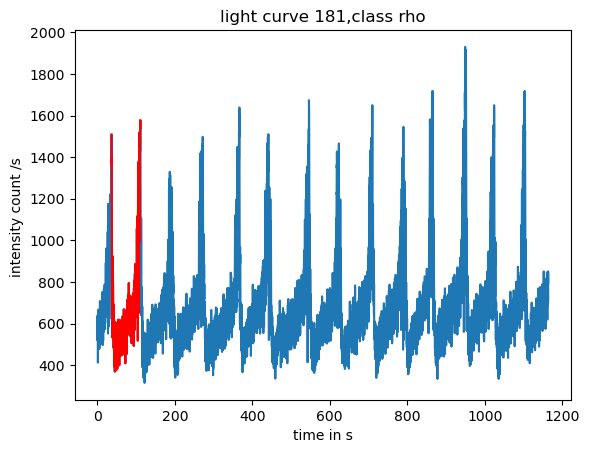

In [74]:
%matplotlib inline

df=pd.read_csv("classified_lcs\grs1915_lc"+str(181)+".txt",sep="	",skiprows=[0, 1], header=None)
df.columns = ["time", 'total','low','mid','high'] #time in seconds
low=np.array(list(df["low"]))

plt.figure()
plt.title("light curve 181,class rho")
plt.xlabel("time in s")
plt.ylabel("intensity count /s ")
plt.plot(np.array(range(len(low)))*0.125,low)

# Plot the selected part in a different color (e.g., red)
plt.plot(np.array(range(294,294+len(shaplet)))/8,shaplet, color='r')
plt.show()


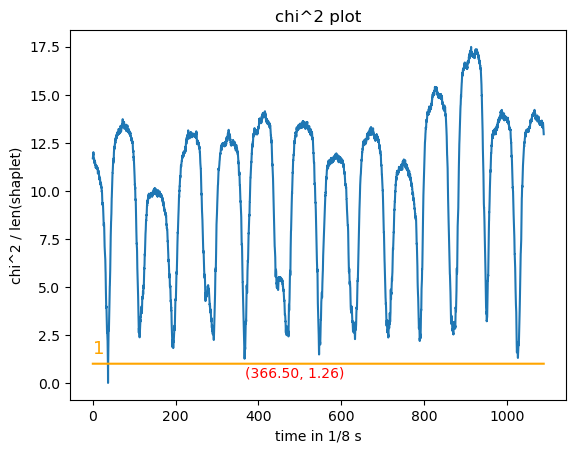

In [82]:
%matplotlib inline
x_point=2932/8
y_point=distancestable[181][int(x_point*8)]
plt.figure()
plt.xlabel("time in 1/8 s")
plt.ylabel("chi^2 / len(shaplet)")
plt.title("chi^2 plot")
plt.plot(np.array(range(len(distancestable[181])))/8,distancestable[181])
plt.plot(np.array(range(len(distancestable[181])))/8,[1]*len(distancestable[181]),color="orange")

# Show the coordinate values near the point
plt.text(0 , 1.5, f"1", fontsize=13, color="orange")

plt.text(x_point , y_point-1, f"({x_point:0.2f}, {y_point:0.2f})", fontsize=10, color="red")

plt.show()

In [27]:
summaryminimas[summarylcindeces==181]

array([0.        , 1.26028333, 1.30147307, 1.48103263, 1.81481573,
       2.18267326, 2.23606216, 2.28122369, 2.36243541, 2.37356907,
       2.4201754 , 2.53075861, 3.21021709])

In [32]:
sorted(summarypositions[(summaryminimas-1.26028)<0.01])

[294, 923, 2932, 8989, 12065, 20962, 22928]

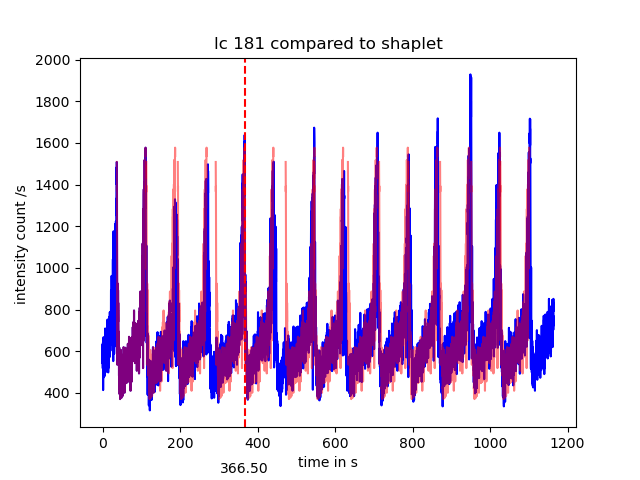

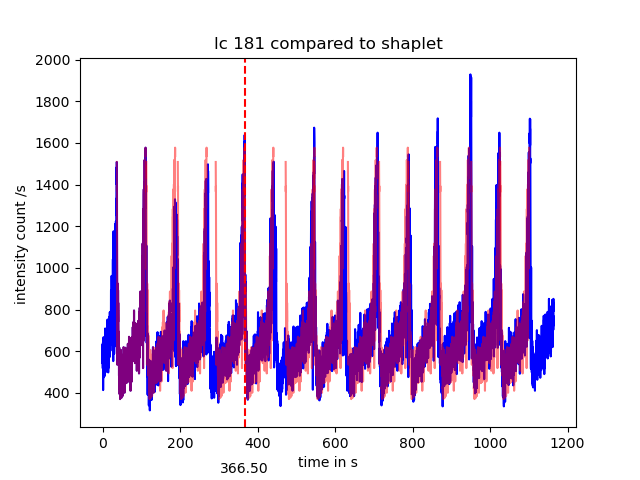

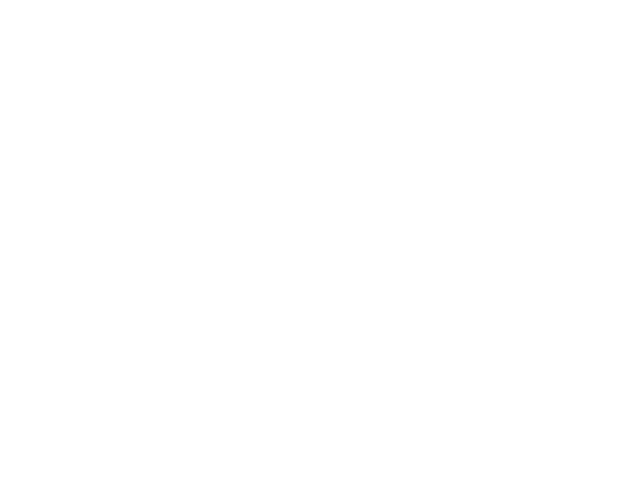

In [83]:
%matplotlib widget

importlib.reload(utilities)

df=pd.read_csv("classified_lcs\grs1915_lc"+str(181)+".txt",sep="	",skiprows=[0, 1], header=None)
df.columns = ["time", 'total','low','mid','high'] #time in seconds
low=np.array(list(df["low"]))
plt.figure()
    
utilities.draw(shaplet,distancestable[181],low,txt="lc 181 compared to shaplet")
plt.show()
#plt.clf()

In [64]:
summarypositions[summaryminimas==0]

array([294])

In [87]:
np.mean(summaryminimas)

46.44604583913949

C:\Users\Ayman\AppData\Local\Temp\ipykernel_17668\785946146.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


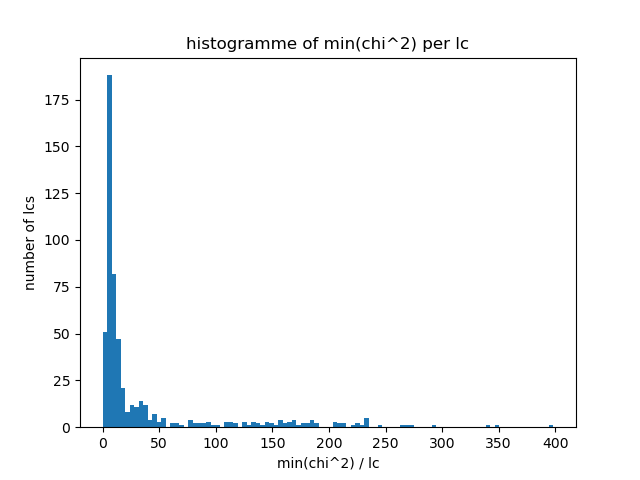

In [111]:
plt.figure()
plt.xlabel("min(chi^2) / lc")
plt.ylabel("number of lcs")
plt.title("histogramme of min(chi^2) per lc")
plt.hist(min_distances_table[argsort_min_],bins=100)
plt.show()

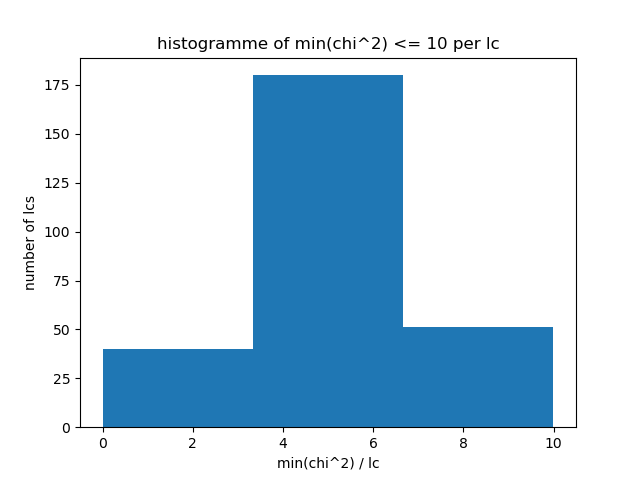

In [114]:
plt.figure()
plt.xlabel("min(chi^2) / lc")
plt.ylabel("number of lcs")
plt.title("histogramme of min(chi^2) <= 10 per lc")
plt.hist(min_distances_table[min_distances_table<=10],bins=3)
plt.show()

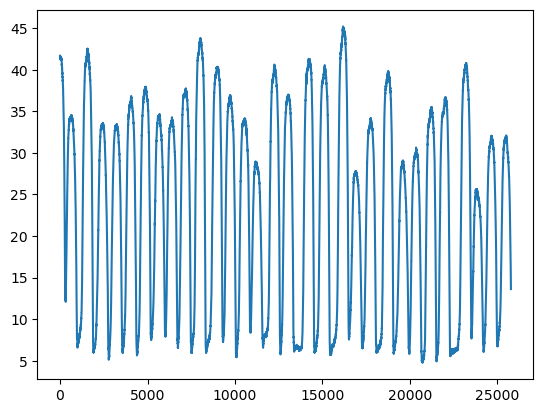

In [204]:
plt.figure()
plt.plot(distancestable[280]/)
plt.show()

In [202]:
%matplotlib inline
plt.figure()
for el in lcclasses["rho"]:
    low=utilities.get_low(el)
    fourier = fftshift(fft(low))
    freqs = np.fft.fftshift(np.fft.fftfreq(len(low)))  # Normalized frequencies
   # plt.figure()
    # Plot the magnitude spectrum
    print(sorted(np.abs(fourier))[0])
    """
    plt.plot(freqs, np.abs(fourier))
    plt.xlim(-0.01,0.01)
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")
    plt.title("FFT result for the low component of the light curve 181,class rho")
    plt.show()"""

29.38507061749247
37.165873859536994
91.9404543050246
87.10007313659045
109.68458399440352
82.83323732300761
157.506229526075
7.105528330112347
37.44948393440979
207.30084930073426
62.51260539351424
57.32140998275782
18.472708847935056
25.738421357051497
42.6528475817843
118.64766655436551
184.55406128085252
121.7523747367836
34.994939888255985
123.80522491260112
117.25015856230665
102.48947846898386
143.16685114525305
261.4185294908406
156.97604909692953
257.51502002609044
193.81605929884608
198.9554614572519
189.39266301454182
57.43296702784736
143.21967711610623
160.6592542307487
48.73123022142699
148.8802087830892
27.47823597476039
80.32624494035406
127.19018559222833
36.88769721248144
64.91419005637545
141.30449508900813
123.87603892337556
63.3520104353209
69.90569400355945
116.76938692939727
86.41812243035037
101.3474122542084
116.11704878767635
209.87272621954006
116.47012471753457
246.79808579711434
265.5801474390571
172.67032197605062
148.08701278986481


<Figure size 640x480 with 0 Axes>